In [2]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding

In [80]:
COPDGene_P1P2_dataset = pd.read_csv('/home/shussein/NetCO/data/COPDGene/COPDGene_SOMA1_3_P1P2_09Aug21.csv', index_col=0)
COPDGene_P1_dataset = COPDGene_P1P2_dataset[COPDGene_P1P2_dataset['Visitnum'] == 1]
COPDGene_P2_dataset = pd.read_csv('/home/shussein/NetCO/data/COPDGene/COPDGene_SOMA1_3_P2_09Aug21.csv', index_col=0)
COPDGene_P3_dataset = pd.read_csv('/home/shussein/NetCO/data/COPDGene/copdg_soma_5k_p3_13may21.csv', index_col=0)
# Adding Visitnum to COPDGene_P2_dataset and COPDGene_P3_dataset
COPDGene_P2_dataset['Visitnum'] = 2
COPDGene_P3_dataset['Visitnum'] = 3
COPDGene_P1P2P3_dataset = pd.concat([COPDGene_P1_dataset, COPDGene_P2_dataset, COPDGene_P3_dataset])

COPDGene_clinical_dataset = pd.read_csv('/home/shussein/NetCO/data/COPDGene/COPDGene_P1P2P3_SM_NS_Long_Oct23.csv', index_col=0, low_memory=False)

In [81]:
COPDGene_P1P2P3_dataset_df = COPDGene_P1P2P3_dataset.reset_index()
COPDGene_P1P2P3_dataset_sorted_df = COPDGene_P1P2P3_dataset_df.sort_values(by=['SID', 'Visitnum'], kind='mergesort')
COPDGene_P1P2P3_dataset = COPDGene_P1P2P3_dataset_sorted_df.set_index('SID')
COPDGene_P1P2P3_dataset

Visitnum  PlateID  X10336_3_3  X10337_83_3  X10339_48_3  X10342_55_3  \
SID                                                                            
10010J         2      NaN       830.6        759.0        799.9        613.2   
10015T         3      NaN         NaN          NaN          NaN          NaN   
10017X         3      NaN         NaN          NaN          NaN          NaN   
10031R         3      NaN         NaN          NaN          NaN          NaN   
10032T         2      NaN       619.5        894.8       2395.8        657.8   
...          ...      ...         ...          ...          ...          ...   
30610T         2      NaN       917.7       1430.5       4782.2        877.9   
30611V         2      NaN       855.6       1248.6       4564.4        962.5   
30614B         2      NaN      1031.8       2230.7       7253.8       1031.9   
30615D         2      NaN       768.2       1310.9       6840.0        936.8   
30616F         2      NaN       634.7       1791.7       7723.0        929.7   

        X10344_334_3  X10346_5_3  X10351_51_3  X10356_21_3  ...  X9981_18  \
SID                                                         ...             
10010J        1178.5       570.8       1121.1      54089.0  ...       NaN   
10015T           NaN         NaN          NaN          NaN  ...     678.5   
10017X           NaN         NaN          NaN          NaN  ...     590.7   
10031R           NaN         NaN          NaN          NaN  ...     616.5   
10032T        2289.4       369.1        899.6      36357.8  ...       NaN   
...              ...         ...          ...          ...  ...       ...   
30610T        2228.0      1009.9       1891.4      73307.6  ...       NaN   
30611V        1884.9       980.6       2040.7      77777.4  ...       NaN   
30614B        2305.2      1145.0      12474.6     124218.7  ...       NaN   
30615D        2380.4       701.5       1997.5      61466.1  ...       NaN   
30616F        2477.5       558.5       1857.6     369129.2  ...       NaN   

        X9983_97  X9984_12  X9986_14  X9989_12  X9993_11  X9994_217  X9995_6  \
SID                                                                            
10010J       NaN       NaN       NaN       NaN       NaN        NaN      NaN   
10015T     528.4     656.6    7538.6     452.3     876.5     1427.2    878.0   
10017X     350.7     560.1    6748.4     423.6     859.2     1392.5   2389.9   
10031R     310.8     599.3    6035.3     413.4     875.0     1881.3   2178.6   
10032T       NaN       NaN       NaN       NaN       NaN        NaN      NaN   
...          ...       ...       ...       ...       ...        ...      ...   
30610T       NaN       NaN       NaN       NaN       NaN        NaN      NaN   
30611V       NaN       NaN       NaN       NaN       NaN        NaN      NaN   
30614B       NaN       NaN       NaN       NaN       NaN        NaN      NaN   
30615D       NaN       NaN       NaN       NaN       NaN        NaN      NaN   
30616F       NaN       NaN       NaN       NaN       NaN        NaN      NaN   

        X9997_12  X9999_1  
SID                        
10010J       NaN      NaN  
10015T    4647.1   1289.0  
10017X   16267.0   2237.5  
10031R   12343.7   2804.2  
10032T       NaN      NaN  
...          ...      ...  
30610T       NaN      NaN  
30611V       NaN      NaN  
30614B       NaN      NaN  
30615D       NaN      NaN  
30616F       NaN      NaN  

[3541 rows x 6286 columns]

In [82]:
# 1. Combine 'SID' and 'Visitnum' into a MultiIndex for COPDGene_dataset
filter_criteria = pd.MultiIndex.from_tuples(
    [(index, row['Visitnum']) for index, row in COPDGene_P1P2P3_dataset.iterrows()],
    names=['SID', 'Visitnum']
)
# 2. Create a MultiIndex for COPDGene_clinical_dataset
COPDGene_clinical_dataset_index = pd.MultiIndex.from_tuples(
    [(index, row['visitnum']) for index, row in COPDGene_clinical_dataset.iterrows()],
    names=['sid', 'visitnum']
)
COPDGene_clinical_dataset = COPDGene_clinical_dataset[COPDGene_clinical_dataset_index.isin(filter_criteria)]
COPDGene_clinical_dataset

cohort ccenter  Phase_study  visitnum  shortterm_flag  \
sid                                                                   
10010J        Smoker     NJC            2         2               0   
10015T        Smoker     BWH            3         3               0   
10017X        Smoker     BWH            3         3               0   
10031R        Smoker     NJC            3         3               0   
10032T        Smoker     NJC            2         2               0   
...              ...     ...          ...       ...             ...   
30610T  Never smoked     UIA            2         2               0   
30611V  Never smoked     UIA            2         2               0   
30614B  Never smoked     UIA            2         2               0   
30615D  Never smoked     UIA            2         2               0   
30616F  Never smoked     UIA            2         2               0   

        Visit_Year  phase_baseline  days_since_baseline  years_from_baseline  \
sid                                                                            
10010J        2015               1                 2757             7.548255   
10015T        2018               1                 3724            10.200000   
10017X        2018               1                 3687            10.090000   
10031R        2018               1                 3959            10.840000   
10032T        2013               1                 1975             5.407255   
...            ...             ...                  ...                  ...   
30610T        2017               2                    0             0.000000   
30611V        2017               2                    0             0.000000   
30614B        2017               2                    0             0.000000   
30615D        2017               2                    0             0.000000   
30616F        2017               2                    0             0.000000   

        years_since_last_visit  ...  SVI2018_RPL_THEME2  SVI2018_RPL_THEME3  \
sid                             ...                                           
10010J                    7.58  ...              0.5959              0.9497   
10015T                    4.53  ...                 NaN                 NaN   
10017X                    4.42  ...                 NaN                 NaN   
10031R                    5.43  ...                 NaN                 NaN   
10032T                    5.33  ...              0.0534              0.0786   
...                        ...  ...                 ...                 ...   
30610T                     NaN  ...              0.5613              0.4494   
30611V                     NaN  ...              0.8419              0.1354   
30614B                     NaN  ...              0.1910              0.1807   
30615D                     NaN  ...              0.1891              0.1509   
30616F                     NaN  ...              0.5139              0.2734   

        SVI2018_RPL_THEME4  SVI2018_RPL_THEMES  ADI2018_ADI_SUPPRESSION_CODE  \
sid                                                                            
10010J              0.3084              0.7885                           NaN   
10015T                 NaN                 NaN                           NaN   
10017X                 NaN                 NaN                           NaN   
10031R                 NaN                 NaN                           NaN   
10032T              0.6728              0.1136                           NaN   
...                    ...                 ...                           ...   
30610T              0.9291              0.6522                           NaN   
30611V              0.1057              0.1798                           NaN   
30614B              0.4308              0.0934                           NaN   
30615D              0.0624              0.0206                           NaN   
30616F              0.1206              0.1111               

In [83]:
# Adjusting for Age and Sex using Regression Residuals
import pandas as pd
import statsmodels.api as sm

COPDGene_clinical_dataset_P1 = COPDGene_clinical_dataset.loc[COPDGene_clinical_dataset['visitnum'] == 1]
COPDGene_clinical_dataset_P2 = COPDGene_clinical_dataset.loc[COPDGene_clinical_dataset['visitnum'] == 2]
COPDGene_clinical_dataset_P3 = COPDGene_clinical_dataset.loc[COPDGene_clinical_dataset['visitnum'] == 3]

COPDGene_P1_dataset = COPDGene_P1_dataset.merge(COPDGene_clinical_dataset_P1['age_visit'], how='left', left_index=True, right_index=True)
COPDGene_P1_dataset = COPDGene_P1_dataset.merge(COPDGene_clinical_dataset_P1['gender'], how='left', left_index=True, right_index=True)
COPDGene_P1_dataset = COPDGene_P1_dataset.merge(COPDGene_clinical_dataset_P1['finalgold_visit'], how='left', left_index=True, right_index=True)
# Dropping NaN Values
COPDGene_P1_dataset = COPDGene_P1_dataset.dropna()
COPDGene_clinical_dataset_P1 = COPDGene_clinical_dataset_P1.loc[COPDGene_P1_dataset.index]
#
COPDGene_P2_dataset  = COPDGene_P2_dataset.merge(COPDGene_clinical_dataset_P2['age_visit'], how='left', left_index=True, right_index=True)
COPDGene_P2_dataset  = COPDGene_P2_dataset.merge(COPDGene_clinical_dataset_P2['gender'], how='left', left_index=True, right_index=True)
COPDGene_P2_dataset  = COPDGene_P2_dataset.merge(COPDGene_clinical_dataset_P2['finalgold_visit'], how='left', left_index=True, right_index=True)
# Dropping NaN Values
COPDGene_P2_dataset = COPDGene_P2_dataset.dropna()
COPDGene_clinical_dataset_P2 = COPDGene_clinical_dataset_P2.loc[COPDGene_P2_dataset.index]
#
COPDGene_P3_dataset = COPDGene_P3_dataset.merge(COPDGene_clinical_dataset_P3['age_visit'], how='left', left_index=True, right_index=True)
COPDGene_P3_dataset = COPDGene_P3_dataset.merge(COPDGene_clinical_dataset_P3['gender'], how='left', left_index=True, right_index=True)
COPDGene_P3_dataset = COPDGene_P3_dataset.merge(COPDGene_clinical_dataset_P3['finalgold_visit'], how='left', left_index=True, right_index=True)
# Dropping NaN Values
COPDGene_P3_dataset = COPDGene_P3_dataset.dropna()
COPDGene_clinical_dataset_P3 = COPDGene_clinical_dataset_P3.loc[COPDGene_P3_dataset.index]

COPDGene_datasets = [COPDGene_P1_dataset, COPDGene_P2_dataset, COPDGene_P3_dataset]
for COPDGene_dataset in COPDGene_datasets:
    # Adjust each Protein for Age
    COPDGene_dataset_adjusted = COPDGene_dataset.copy()
    protein_columns = [col for col in COPDGene_dataset_adjusted.columns if col.startswith('X')]

    for protein in protein_columns:
        # Regression Model: Protein ~ Age
        X = sm.add_constant(COPDGene_dataset[['age_visit', 'gender']])  # Add intercept
        y = COPDGene_dataset[protein]
        model = sm.OLS(y, X).fit()

        # Residuals are the Age-Adjusted Values
        COPDGene_dataset_adjusted[protein] = model.resid

    COPDGene_dataset = COPDGene_dataset_adjusted

In [87]:

import pandas as pd
from scipy import stats

from sklearn.manifold import LocallyLinearEmbedding
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

def remove_outliers(scores, threshold=1.5):
    z_scores = np.abs(stats.zscore(scores))
    return scores[z_scores < threshold]

def compute_neighborhood_preservation_outliers(X, X_transformed, n_neighbors=10):
    # Fit NearestNeighbors on the Original and Embedding Space
    # TODO: Check other Distances (Manhattan, Euclidean, ..etc)
    nbrs_original = NearestNeighbors(n_neighbors=n_neighbors+1).fit(X)
    nbrs_transformed = NearestNeighbors(n_neighbors=n_neighbors+1).fit(X_transformed)

    # Get the Indicies of the K-Nearest Neighbors
    original_neighbors = nbrs_original.kneighbors(X, return_distance=False)[:, 1:]
    transformed_neighbors = nbrs_transformed.kneighbors(X_transformed, return_distance=False)[:, 1:]

    # Calculate the Neighborhood Preservation Score
    preservation_scores = []
    for i in range(X.shape[0]):
        shared_neighbors = len(set(original_neighbors[i]).intersection(set(transformed_neighbors[i])))
        preservation_score = shared_neighbors / n_neighbors
        preservation_scores.append(preservation_score)

    preservation_scores = np.array(preservation_scores)
    filtered_preservation_scores = remove_outliers(preservation_scores)

    return np.mean(filtered_preservation_scores)

def compute_neighborhood_preservation(X, X_transformed, n_neighbors=10):
    # Fit NearestNeighbors on the Original and Embedding Space
    nbrs_original = NearestNeighbors(n_neighbors=n_neighbors+1).fit(X)
    nbrs_transformed = NearestNeighbors(n_neighbors=n_neighbors+1).fit(X_transformed)

    # Get the Indicies of the K-Nearest Neighbors
    original_neighbors = nbrs_original.kneighbors(X, return_distance=False)[:, 1:]
    transformed_neighbors = nbrs_transformed.kneighbors(X_transformed, return_distance=False)[:, 1:]

    # Calculate the Neighborhood Preservation Score
    preservation_scores = []
    for i in range(X.shape[0]):
        shared_neighbors = len(set(original_neighbors[i]).intersection(set(transformed_neighbors[i])))
        preservation_score = shared_neighbors / n_neighbors
        preservation_scores.append(preservation_score)
    mean_score = np.mean(preservation_scores)
    return mean_score

def compute_distance_preservation(X, X_transformed, metric='euclidean'):
    original_distances = pairwise_distances(X, metric=metric).flatten()
    transformed_distances = pairwise_distances(X_transformed, metric=metric).flatten()

    corr_coef = np.corrcoef(original_distances, transformed_distances)[0, 1]
    return corr_coef


--- Generating Manifold for Visit 0 ---
Index(['X4549_78_2', 'X3332_57_1', 'X3060_43_2', 'X4568_17_2', 'X3362_61_2',
       'X2579_17_5', 'X5483_1_3', 'X3516_60_2', 'X2948_58_2', 'X3799_11_2',
       'X5105_2_3', 'X3024_18_2', 'X4811_33_3', 'X4878_3_1', 'X3554_24_1',
       'X4148_49_2', 'X2822_56_2', 'X4541_49_2', 'X5339_49_3', 'X3504_58_2'],
      dtype='object')
Reconstruction Error: 0.0075
Neighborhood Preservation Score: 0.0625
Pairwise Distance Preservation Score: 0.4018


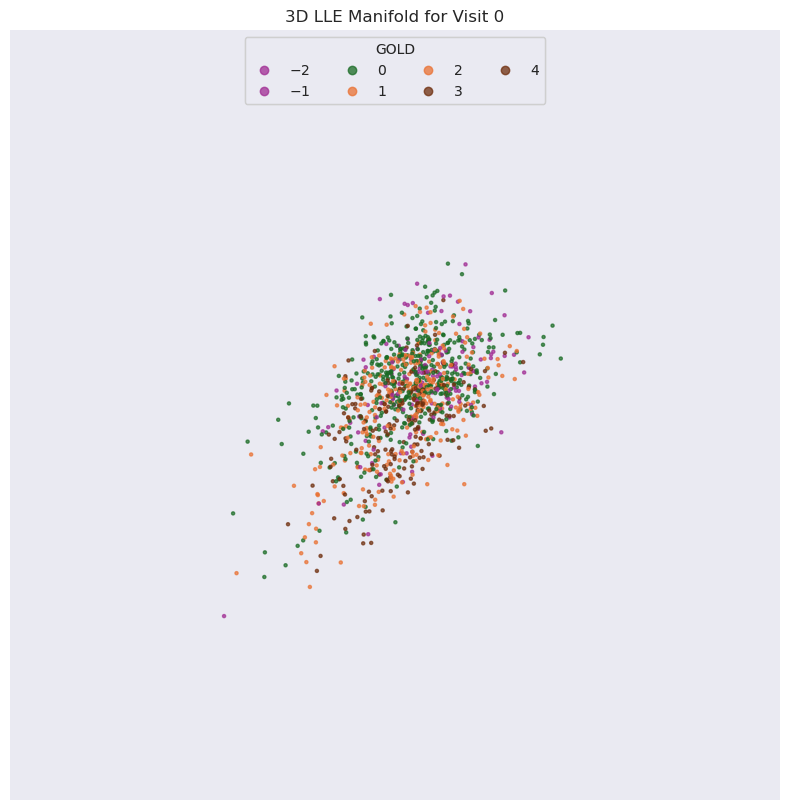


--- Generating Manifold for Visit 1 ---
Index(['X2677_1_1', 'X4152_58_2', 'X5483_1_3', 'X5456_59_2', 'X5470_69_2',
       'X7640_29_3', 'X3449_58_2', 'X5116_62_2', 'X2948_58_2', 'X3484_60_2',
       'X5465_32_3', 'X3389_7_2', 'X3332_57_1', 'X3077_66_2', 'X4568_17_2',
       'X5107_7_2', 'X4541_49_2', 'X3352_80_3', 'X5315_22_3', 'X2750_3_2'],
      dtype='object')
Reconstruction Error: 0.0069
Neighborhood Preservation Score: 0.0838
Pairwise Distance Preservation Score: 0.7291


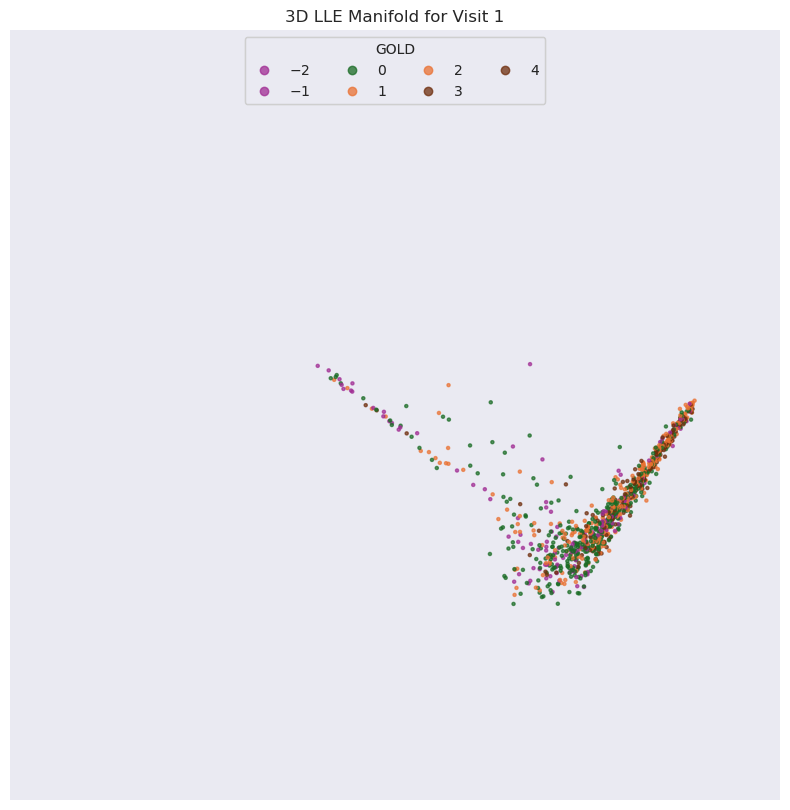


--- Generating Manifold for Visit 2 ---
Index(['X11388_75', 'X15533_97', 'X4549_78', 'X3060_43', 'X3362_61',
       'X2652_15', 'X13565_2', 'X11109_56', 'X11178_21', 'X4496_60',
       'X4374_45', 'X5124_69', 'X2643_57', 'X2677_1', 'X2948_58', 'X13676_46',
       'X16300_4', 'X2637_77', 'X15585_304', 'X5581_28'],
      dtype='object')
Reconstruction Error: 0.0069
Neighborhood Preservation Score: 0.0814
Pairwise Distance Preservation Score: 0.7551


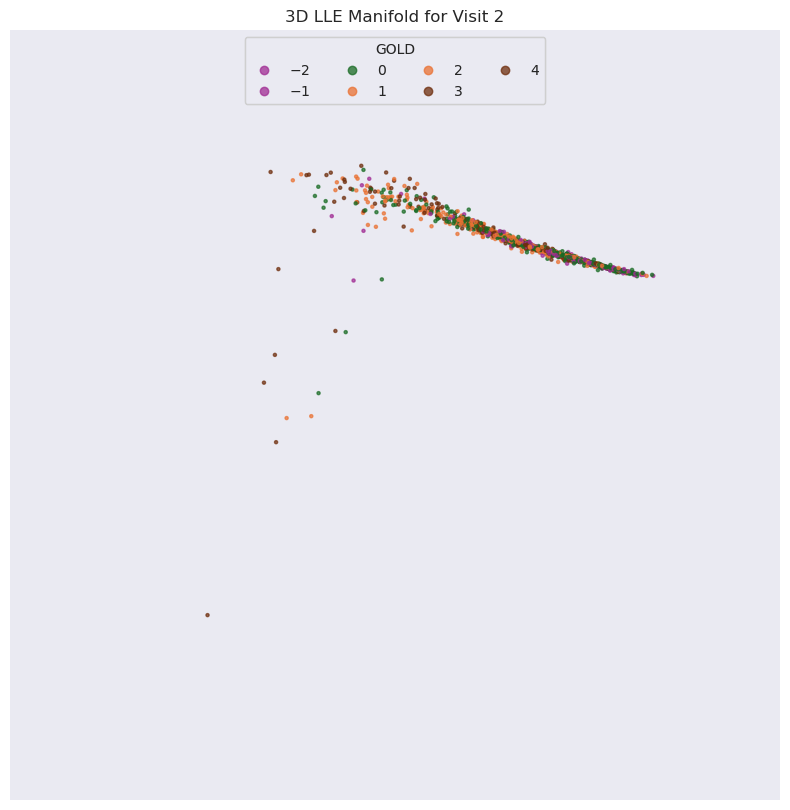

In [103]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd

# Function to Generate and Evaluate Manifold
def generate_manifold(COPDGene_dataset, visit_num, k=20, n_neighbors=15, n_components=3):

    print(f"\n--- Generating Manifold for Visit {visit_num} ---")
    # Feature selection based on correlation
    X = COPDGene_dataset.loc[:, COPDGene_dataset.columns.str.startswith('X')]
    Y = COPDGene_dataset['finalgold_visit']

    # Select top k features
    corr = X.corrwith(Y).abs().sort_values(ascending=False)
    trimmed = X[corr[:k].index.tolist()]
    print(trimmed.columns)

    # Standardize the dataset
    scaler = StandardScaler()
    trimmed = pd.DataFrame(scaler.fit_transform(trimmed), columns=trimmed.columns)

    # Run LLE
    lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components,
                                 reg=0.01, max_iter=1000, random_state=42)
    embedding = lle.fit_transform(trimmed)

    # Evaluate the manifold
    reconstruction_error = lle.reconstruction_error_
    neighborhood_preservation_score = compute_neighborhood_preservation(trimmed, embedding)
    pairwise_distances_preservation_score = compute_distance_preservation(trimmed, embedding)

    print("Reconstruction Error: %.4f" % reconstruction_error)
    print("Neighborhood Preservation Score: %.4f" % neighborhood_preservation_score)
    print("Pairwise Distance Preservation Score: %.4f" % pairwise_distances_preservation_score)

    # 3D Scatter Plot
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    custom_cmap = ListedColormap(['#A02B93', '#196B24', '#E97132', '#6E2D0C'])  # Custom colors
    sc = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=Y, s=5, alpha=0.7, cmap=custom_cmap)

    # Add legend
    legend1 = ax.legend(*sc.legend_elements(), loc="upper center", title="GOLD", ncol=4)
    ax.add_artist(legend1)

    # Hide grid and axes for cleaner plot
    ax.grid(False)
    ax.set_axis_off()
    fig.patch.set_alpha(0.0)

    plt.title(f"3D LLE Manifold for Visit {visit_num}")
    plt.show()
    return embedding

manifolds = []
# Generate Manifolds for Visit 1, 2, and 3
for idx, COPDGene_dataset in enumerate(COPDGene_datasets):
    manifolds.append(generate_manifold(COPDGene_dataset, visit_num=idx))


In [ ]:
# Qualitative Comparison of Manifolds
# 1. Visualization
# 1. Visualization for their Structure
# 2. Color Coding for Corresponding Variables e.g., Phenotype, Clinical Variables, Omics
# 3. Point Correspondence
# 2. Topological Structures
# Evaluate Clusters, Holes, or Connected Components in Each Manifold
# 3. Neighborhood Structure
# Plot Nearest Neighbors or K-NN Graphs - Use a Neighborhood Graph to Determine if Local Neighborhoods are Preserved

In [94]:
from scipy.spatial.distance import pdist, squareform

def pairwise_distance_stress(X1, X2):
    """
    Compute stress (discrepancy) between pairwise distances of two manifolds.
    :param X1: First embedding (n_samples, n_dims)
    :param X2: Second embedding (n_samples, n_dims)
    :return: Stress value
    """
    D1 = squareform(pdist(X1, metric='euclidean'))
    D2 = squareform(pdist(X2, metric='euclidean'))

    stress_value = np.sqrt(np.sum((D1 - D2)**2) / np.sum(D1**2))
    return stress_value

from sklearn.neighbors import NearestNeighbors

def neighborhood_preservation(X1, X2, k=5):
    """
    Compute neighborhood preservation score between two manifolds.
    :param X1: First embedding (n_samples, n_dims)
    :param X2: Second embedding (n_samples, n_dims)
    :param k: Number of neighbors
    :return: Average neighborhood preservation score
    """
    nbrs1 = NearestNeighbors(n_neighbors=k).fit(X1)
    nbrs2 = NearestNeighbors(n_neighbors=k).fit(X2)

    knn1 = nbrs1.kneighbors(X1, return_distance=False)
    knn2 = nbrs2.kneighbors(X2, return_distance=False)

    scores = []
    for i in range(X1.shape[0]):
        shared = len(set(knn1[i]) & set(knn2[i]))
        scores.append(shared / k)

    return np.mean(scores)
from scipy.stats import spearmanr

def distance_correlation(X1, X2):
    """
    Compute Spearman correlation between pairwise distances in two manifolds.
    :param X1: First embedding (n_samples, n_dims)
    :param X2: Second embedding (n_samples, n_dims)
    :return: Spearman correlation coefficient
    """
    D1 = pdist(X1, metric='euclidean')
    D2 = pdist(X2, metric='euclidean')

    correlation, _ = spearmanr(D1, D2)
    return correlation
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

def clustering_similarity(X1, X2, n_clusters=3):
    """
    Compare clustering results on two manifolds using ARI.
    :param X1: First embedding (n_samples, n_dims)
    :param X2: Second embedding (n_samples, n_dims)
    :param n_clusters: Number of clusters
    :return: Adjusted Rand Index (ARI)
    """
    kmeans1 = KMeans(n_clusters=n_clusters).fit(X1)
    kmeans2 = KMeans(n_clusters=n_clusters).fit(X2)

    labels1 = kmeans1.labels_
    labels2 = kmeans2.labels_

    ari = adjusted_rand_score(labels1, labels2)
    return ari



In [97]:
# Quantitative Comparison of Manifolds
# Subsampling from the Larger Manifold so that both have the same number of points
import numpy as np

def subsample_manifolds(X1, X2):
    """
    Subsample the larger manifold to match the size of the smaller manifold.
    :param X1: First manifold (n_samples1, n_dims)
    :param X2: Second manifold (n_samples2, n_dims)
    :return: Subsampled versions of X1 and X2 with equal sizes
    """
    if X1.shape[0] > X2.shape[0]:
        indices = np.random.choice(X1.shape[0], size=X2.shape[0], replace=False)
        X1 = X1[indices]
    elif X2.shape[0] > X1.shape[0]:
        indices = np.random.choice(X2.shape[0], size=X1.shape[0], replace=False)
        X2 = X2[indices]
    return X1, X2

X1_sub, X2_sub = subsample_manifolds(manifolds[1], manifolds[2])
print("Subsampled Sizes:", X1_sub.shape, X2_sub.shape)

# 1. Reconstruction Error
# 2. Pairwise Distance Preservation
stress_val = pairwise_distance_stress(X1_sub, X2_sub)
print("Pairwise Distance Stress:", stress_val)
preservation_score = neighborhood_preservation(X1_sub, X2_sub, k=5)
print("Neighborhood Preservation Score:", preservation_score)
# 3. Neighborhood Preservation Score
# 4. Correlation Between Pairwise Distances
corr = distance_correlation(X1_sub, X2_sub)
print("Spearman Distance Correlation:", corr)
# 5. Cluster Similarity Metrics

ari_score = clustering_similarity(X1_sub, X2_sub, n_clusters=3)
print("Clustering Similarity (ARI):", ari_score)
# 6. Geodesic Distance Preservation

Subsampled Sizes: (965, 3) (965, 3)
Pairwise Distance Stress: 0.8647697952128145
Neighborhood Preservation Score: 0.20186528497409328
Spearman Distance Correlation: -0.002961611259300467
Clustering Similarity (ARI): 0.024803221636482176


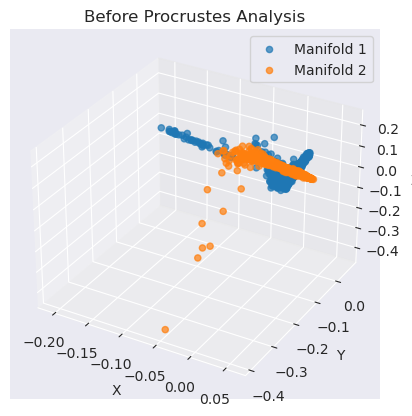

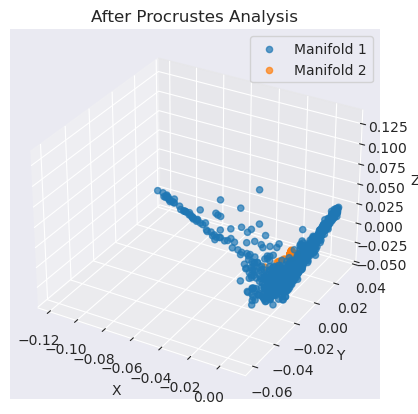

Procrustes Disparity: 0.9971


In [98]:
import numpy as np
from scipy.spatial import procrustes
import matplotlib.pyplot as plt

def procrustes_analysis(X1, X2):
    """
    Perform Procrustes analysis to align two manifolds.
    :param X1: First manifold (n_samples, n_dims)
    :param X2: Second manifold (n_samples, n_dims)
    :return: Aligned versions of X1 and X2, disparity value
    """
    mtx1, mtx2, disparity = procrustes(X1, X2)
    return mtx1, mtx2, disparity

def plot_manifolds(X1, X2, title="Manifold Visualization"):
    """
    Plot two manifolds in 2D or 3D for comparison.
    :param X1: First manifold (n_samples, n_dims)
    :param X2: Second manifold (n_samples, n_dims)
    :param title: Plot title
    """
    fig = plt.figure()

    if X1.shape[1] == 3:  # 3D plot
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], label="Manifold 1", alpha=0.7)
        ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], label="Manifold 2", alpha=0.7)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
    else:  # 2D plot
        plt.scatter(X1[:, 0], X1[:, 1], label="Manifold 1", alpha=0.7)
        plt.scatter(X2[:, 0], X2[:, 1], label="Manifold 2", alpha=0.7)
        plt.xlabel("X")
        plt.ylabel("Y")

    plt.title(title)
    plt.legend()
    plt.show()


# Perform Procrustes Analysis
X1_aligned, X2_aligned, disparity = procrustes_analysis(X1_sub, X2_sub)

# Visualization before alignment
plot_manifolds(X1_sub, X2_sub, title="Before Procrustes Analysis")

# Visualization after alignment
plot_manifolds(X1_aligned, X2_aligned, title="After Procrustes Analysis")

print(f"Procrustes Disparity: {disparity:.4f}")


/tmp/ipykernel_2531008/4046612472.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=labels1, cmap='viridis', alpha=0.7)
/tmp/ipykernel_2531008/4046612472.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c=labels2, cmap='viridis', alpha=0.7)


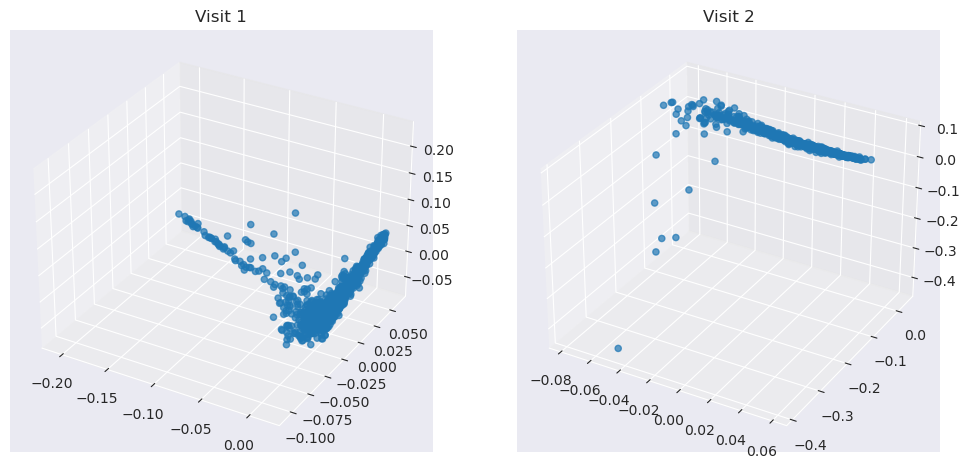

In [99]:
import matplotlib.pyplot as plt
import numpy as np

def plot_side_by_side(X1, X2, labels1=None, labels2=None, title1="Manifold 1", title2="Manifold 2"):
    """
    Plot two manifolds side-by-side in 2D or 3D for visual comparison.
    :param X1: First manifold (n_samples, n_dims)
    :param X2: Second manifold (n_samples, n_dims)
    :param labels1: Labels for coloring points in Manifold 1 (optional)
    :param labels2: Labels for coloring points in Manifold 2 (optional)
    :param title1: Title for the first manifold
    :param title2: Title for the second manifold
    """
    fig = plt.figure(figsize=(12, 6))

    if X1.shape[1] == 3:  # 3D plot
        ax1 = fig.add_subplot(121, projection='3d')
        ax2 = fig.add_subplot(122, projection='3d')

        ax1.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=labels1, cmap='viridis', alpha=0.7)
        ax2.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c=labels2, cmap='viridis', alpha=0.7)
        ax1.set_title(title1)
        ax2.set_title(title2)
    else:  # 2D plot
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122)

        ax1.scatter(X1[:, 0], X1[:, 1], cmap='viridis', alpha=0.7)
        ax2.scatter(X2[:, 0], X2[:, 1], cmap='viridis', alpha=0.7)
        ax1.set_title(title1)
        ax2.set_title(title2)
        ax1.set_xlabel("X")
        ax1.set_ylabel("Y")
        ax2.set_xlabel("X")
        ax2.set_ylabel("Y")

    plt.show()

plot_side_by_side(X1_sub, X2_sub, title1="Visit 1", title2="Visit 2")


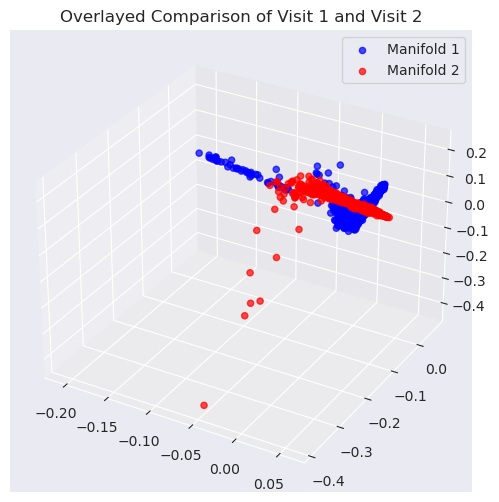

In [100]:
def plot_overlayed_manifolds(X1, X2, title="Overlayed Manifolds"):
    """
    Overlay two manifolds in the same plot to compare their structure.
    :param X1: First manifold (n_samples, n_dims)
    :param X2: Second manifold (n_samples, n_dims)
    :param title: Plot title
    """
    plt.figure(figsize=(8, 6))

    if X1.shape[1] == 3:  # 3D overlay
        ax = plt.axes(projection='3d')
        ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], label="Manifold 1", alpha=0.7, c='blue')
        ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], label="Manifold 2", alpha=0.7, c='red')
        ax.set_title(title)
        ax.legend()
    else:  # 2D overlay
        plt.scatter(X1[:, 0], X1[:, 1], label="Manifold 1", alpha=0.7, c='blue')
        plt.scatter(X2[:, 0], X2[:, 1], label="Manifold 2", alpha=0.7, c='red')
        plt.title(title)
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend()

    plt.show()

plot_overlayed_manifolds(X1_sub, X2_sub, title="Overlayed Comparison of Visit 1 and Visit 2")


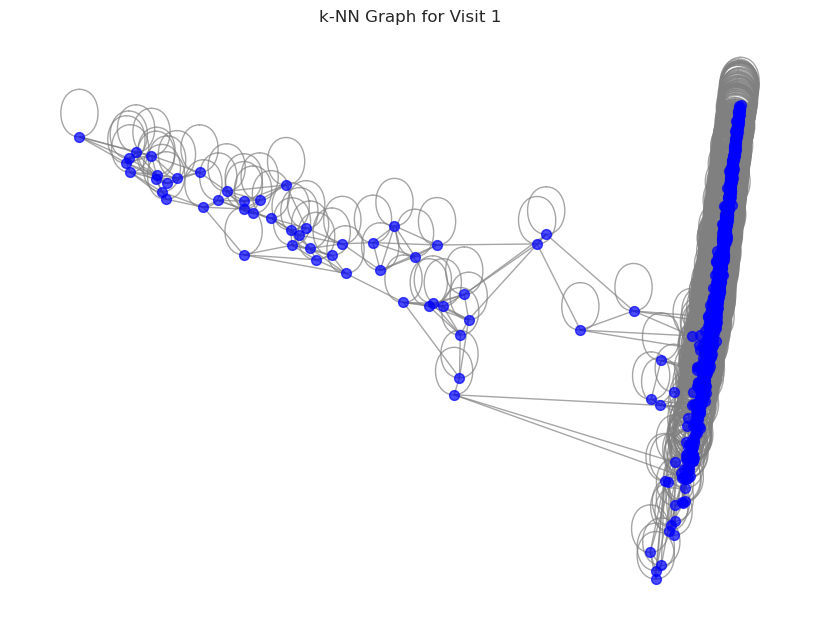

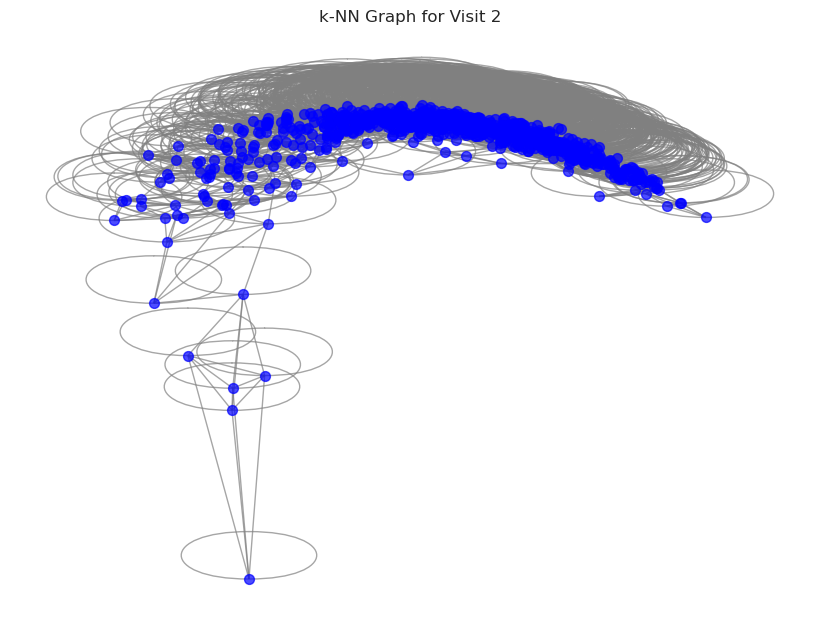

In [102]:
from sklearn.neighbors import NearestNeighbors
import networkx as nx

def plot_knn_graph(X, k=5, title="k-NN Graph"):
    """
    Plot the k-nearest neighbor graph for a manifold.
    :param X: Manifold (n_samples, n_dims)
    :param k: Number of neighbors
    :param title: Plot title
    """
    nbrs = NearestNeighbors(n_neighbors=k).fit(X)
    graph = nbrs.kneighbors_graph(X).toarray()
    G = nx.Graph()

    for i in range(X.shape[0]):
        G.add_node(i, pos=(X[i, 0], X[i, 1]))
        for j in range(X.shape[0]):
            if graph[i, j] == 1:
                G.add_edge(i, j)

    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_size=50, node_color='blue', alpha=0.7, edge_color='gray')
    plt.title(title)
    plt.show()


plot_knn_graph(X1_sub, k=5, title="k-NN Graph for Visit 1")
plot_knn_graph(X2_sub, k=5, title="k-NN Graph for Visit 2")


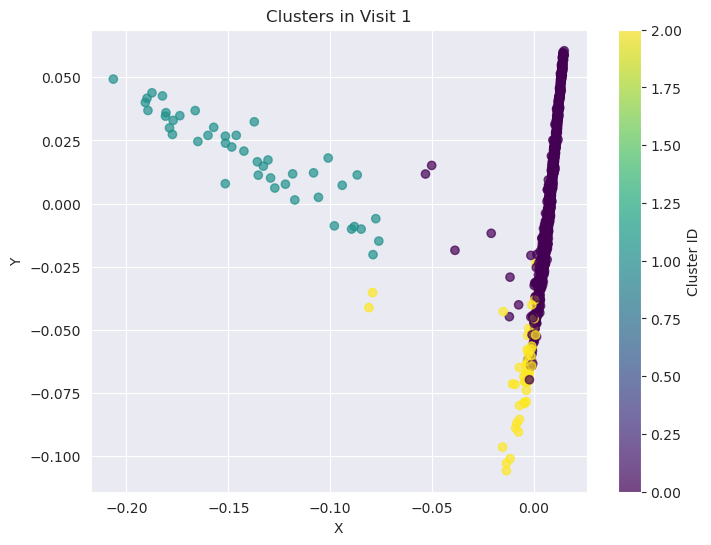

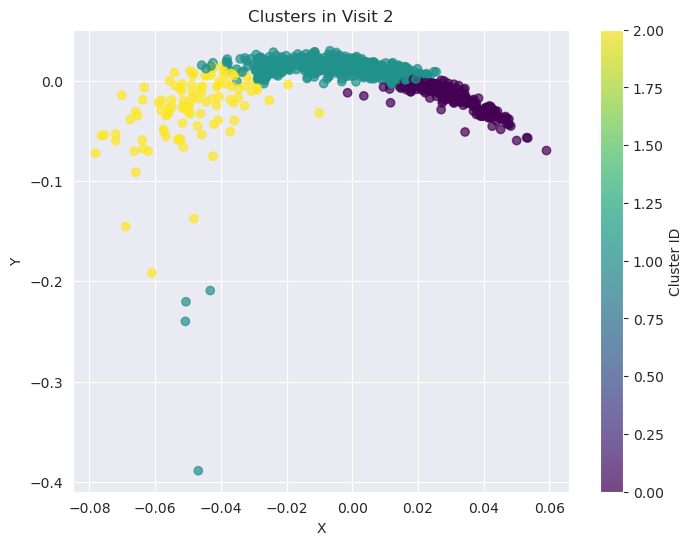

In [101]:
from sklearn.cluster import KMeans

def plot_clusters(X, n_clusters=3, title="Clustered Manifold"):
    """
    Perform clustering and plot the results.
    :param X: Manifold (n_samples, n_dims)
    :param n_clusters: Number of clusters
    :param title: Plot title
    """
    kmeans = KMeans(n_clusters=n_clusters).fit(X)
    labels = kmeans.labels_

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.colorbar(label="Cluster ID")
    plt.show()

plot_clusters(X1_sub, n_clusters=3, title="Clusters in Visit 1")
plot_clusters(X2_sub, n_clusters=3, title="Clusters in Visit 2")


Reconstruction Error: 0.005060243316646359
Neighborhood Preservation Score: 0.1095336787564767
Pairwise Distance Preservation Score: 0.772091170021039


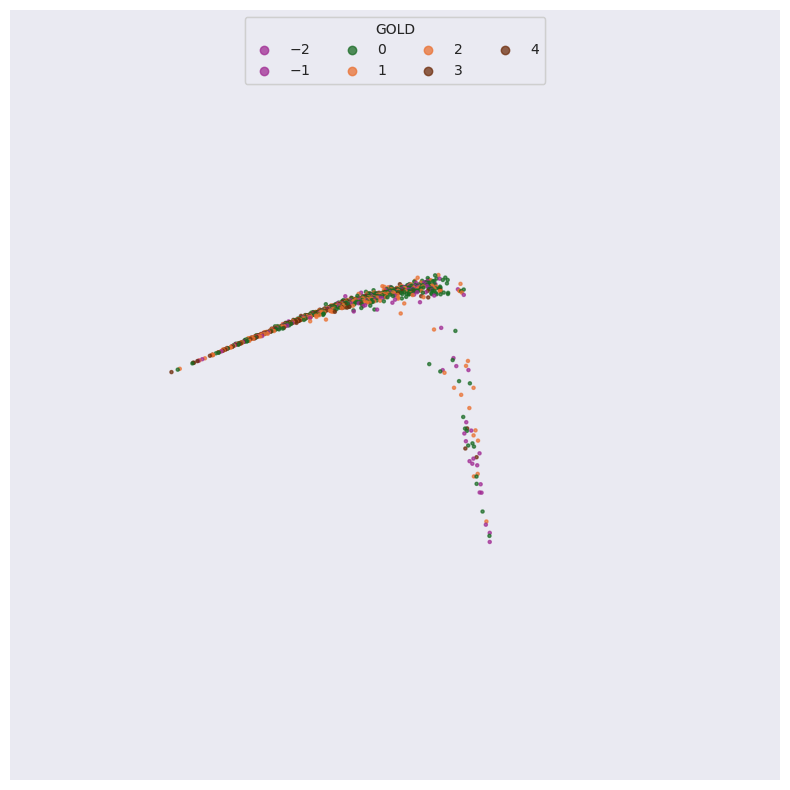

In [100]:
# A Simple Feature Selection Approach Prior to Running Manifold Learning LLE (Selecting the Top K-Related Features)
# Generating a Manifold Based on 1 Visit
# COPDGene_dataset_V2 = COPDGene_dataset[COPDGene_dataset['Visitnum'] == 2]
COPDGene_dataset_V2 = COPDGene_P2_dataset

X = COPDGene_dataset_V2.loc[:, COPDGene_dataset_V2.columns.str.startswith('X')]
# Select all Columns Except 'Visitnum' and 'finalgold_visit'
Y = COPDGene_dataset_V2['finalgold_visit']
k = 20
corr = X[X.columns].corrwith(Y).abs().sort_values(ascending=False)
trimmed = X[corr[:k].index.tolist()]
features = trimmed.columns

# Standardize the dataset
scaler = StandardScaler()
trimmed = pd.DataFrame(scaler.fit_transform(trimmed), columns=trimmed.columns)

lle = LocallyLinearEmbedding(n_neighbors=15, n_components=3, reg=0.01, max_iter=1000, random_state=42)
embedding = lle.fit_transform(trimmed)

# Evaluating the Quality of the Generated Manifold
reconstruction_error = lle.reconstruction_error_ 
neighborhood_preservation_score = compute_neighborhood_preservation(trimmed, embedding)
pairwise_distances_preservation_score_euclidean = compute_distance_preservation(trimmed, embedding)
pairwise_distances_preservation_score_manhattan = compute_distance_preservation(trimmed, embedding, 'manhattan')

print("Reconstruction Error: %s\nNeighborhood Preservation Score: %s\nPairwise Distance Preservation Score: %s" % 
      (reconstruction_error,
       neighborhood_preservation_score,
       pairwise_distances_preservation_score_euclidean))
# Create a 3D scatter plot of the LLE embedding
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
custom_cmap = ListedColormap(['#A02B93', '#196B24', '#E97132', '#6E2D0C'])  # Red, Green, Blue, Yellow
sc = ax.scatter(embedding[:, 0], embedding[:, 1], c=Y, s=5, alpha=0.7, cmap=custom_cmap)

legend1 = ax.legend(*sc.legend_elements(), loc="upper center", title="GOLD", ncol=4)
ax.add_artist(legend1)
ax.grid(False)
ax.set_axis_off()
fig.patch.set_alpha(0.0)

plt.show()

In [39]:
COPDGene_dataset_V1 = COPDGene_dataset[COPDGene_dataset['Visitnum'] == 1]
COPDGene_dataset_V3 = COPDGene_dataset[COPDGene_dataset['Visitnum'] == 3]

X = COPDGene_dataset_V1.loc[:, COPDGene_dataset_V1.columns.str.startswith('X')]
# Select all Columns Except 'Visitnum' and 'finalgold_visit'
Y = COPDGene_dataset_V1['finalgold_visit']
trimmed = X[features]

# Standardize the dataset
scaler = StandardScaler()
trimmed = pd.DataFrame(scaler.fit_transform(trimmed), columns=trimmed.columns)

manifold_visit2 = lle.transform(trimmed)

X = COPDGene_dataset_V3.loc[:, COPDGene_dataset_V3.columns.str.startswith('X')]
# Select all Columns Except 'Visitnum' and 'finalgold_visit'
Y = COPDGene_dataset_V3['finalgold_visit']
trimmed = X[features]

# Standardize the dataset
scaler = StandardScaler()
trimmed = pd.DataFrame(scaler.fit_transform(trimmed), columns=trimmed.columns)

manifold_visit3 = lle.transform(trimmed)

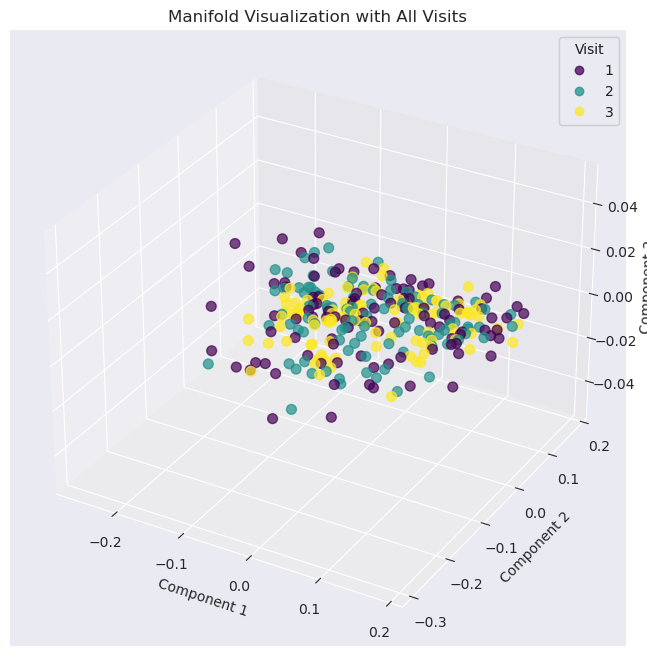

In [40]:
import matplotlib.pyplot as plt

# Combine the manifold projections
# `manifold_visit1`, `manifold_visit2`, and `manifold_visit3` are the 3D projections from the LLE
manifold_all = np.vstack([embedding, manifold_visit2, manifold_visit3])
labels = np.array([1] * len(embedding) + [2] * len(manifold_visit2) + [3] * len(manifold_visit3))  # Visit labels

# Create a scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot, coloring points by visit
scatter = ax.scatter(
    manifold_all[:, 0],
    manifold_all[:, 1],
    # manifold_all[:, 2],
    c=labels,
    cmap='viridis',
    s=50,
    alpha=0.7
)

# Add legend and labels
legend = ax.legend(*scatter.legend_elements(), title="Visit")
ax.add_artist(legend)
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
ax.set_title("Manifold Visualization with All Visits")

plt.show()


Reconstruction Error: 0.02703919209537865
Neighborhood Preservation Score: 0.27058823529411763
Pairwise Distance Preservation Score: 0.6494299802695218


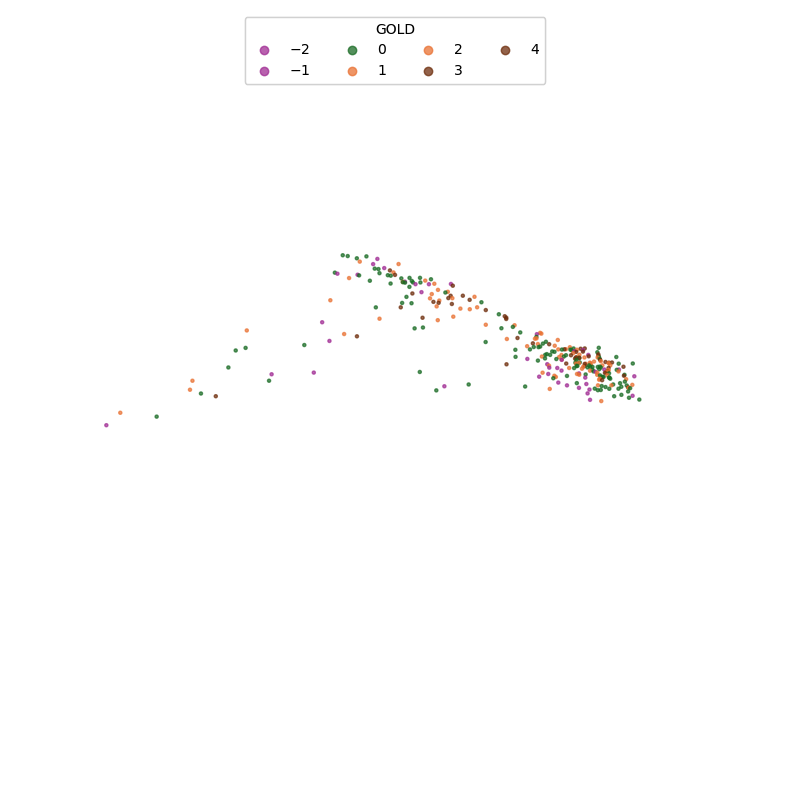

In [77]:
# A Simple Feature Selection Approach Prior to Running Manifold Learning LLE (Selecting the Top K-Related Features)
X = COPDGene_dataset_adjusted_for_age.loc[:, ~COPDGene_dataset_adjusted_for_age.columns.isin(['finalgold_visit', 'Visitnum', 'age_visit'])]
# Select all Columns Except 'Visitnum' and 'finalgold_visit'
Y = COPDGene_dataset_adjusted_for_age['finalgold_visit']
k = 30
corr = X[X.columns].corrwith(Y).abs().sort_values(ascending=False)
trimmed = X[corr[:k].index.tolist()]

# Standardize the dataset
scaler = StandardScaler()
trimmed = pd.DataFrame(scaler.fit_transform(trimmed), columns=trimmed.columns)

lle = LocallyLinearEmbedding(n_neighbors=50, n_components=3, reg=0.01, max_iter=1000, random_state=42)
embedding = lle.fit_transform(trimmed)

# Evaluating the Quality of the Generated Manifold
reconstruction_error = lle.reconstruction_error_
neighborhood_preservation_score = compute_neighborhood_preservation(trimmed, embedding)
pairwise_distances_preservation_score_euclidean = compute_distance_preservation(trimmed, embedding)
pairwise_distances_preservation_score_manhattan = compute_distance_preservation(trimmed, embedding, 'manhattan')

print("Reconstruction Error: %s\nNeighborhood Preservation Score: %s\nPairwise Distance Preservation Score: %s" %
      (reconstruction_error,
       neighborhood_preservation_score,
       pairwise_distances_preservation_score_euclidean))
# Create a 3D scatter plot of the LLE embedding
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
custom_cmap = ListedColormap(['#A02B93', '#196B24', '#E97132', '#6E2D0C'])  # Red, Green, Blue, Yellow
sc = ax.scatter(embedding[:, 0], embedding[:, 1], c=Y, s=5, alpha=0.7, cmap=custom_cmap)

legend1 = ax.legend(*sc.legend_elements(), loc="upper center", title="GOLD", ncol=4)
ax.add_artist(legend1)
ax.grid(False)
ax.set_axis_off()
fig.patch.set_alpha(0.0)

plt.show()

Reconstruction Error: 0.02430206840451464
Neighborhood Preservation Score: 0.27385620915032677
Pairwise Distance Preservation Score: 0.6177480852917571


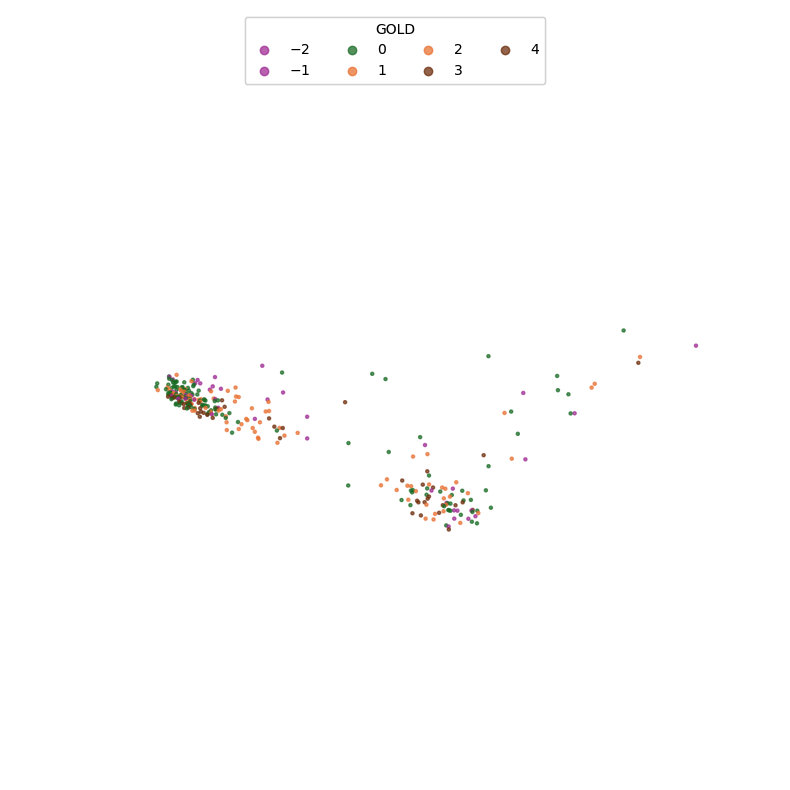

In [72]:
# A Simple Feature Selection Approach Prior to Running Manifold Learning LLE (Selecting the Top K-Related Features)
X = COPDGene_dataset
X['age_visit'] = COPDGene_clinical_dataset['age_visit']
X = X.loc[:, ~X.columns.isin(['finalgold_visit', 'Visitnum'])]
# Select all Columns Except 'Visitnum' and 'finalgold_visit'
Y = COPDGene_dataset['finalgold_visit']
k = 30
corr = X[X.columns].corrwith(Y).abs().sort_values(ascending=False)
trimmed = X[corr[:k].index.tolist()]

# Standardize the dataset
scaler = StandardScaler()
trimmed = pd.DataFrame(scaler.fit_transform(trimmed), columns=trimmed.columns)

lle = LocallyLinearEmbedding(n_neighbors=50, n_components=3, reg=0.01, max_iter=1000, random_state=42)
embedding = lle.fit_transform(trimmed)

# Evaluating the Quality of the Generated Manifold
reconstruction_error = lle.reconstruction_error_
neighborhood_preservation_score = compute_neighborhood_preservation(trimmed, embedding)
pairwise_distances_preservation_score_euclidean = compute_distance_preservation(trimmed, embedding)
pairwise_distances_preservation_score_manhattan = compute_distance_preservation(trimmed, embedding, 'manhattan')

print("Reconstruction Error: %s\nNeighborhood Preservation Score: %s\nPairwise Distance Preservation Score: %s" %
      (reconstruction_error,
       neighborhood_preservation_score,
       pairwise_distances_preservation_score_euclidean))
# Create a 3D scatter plot of the LLE embedding
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
custom_cmap = ListedColormap(['#A02B93', '#196B24', '#E97132', '#6E2D0C'])  # Red, Green, Blue, Yellow
sc = ax.scatter(embedding[:, 0], embedding[:, 1], c=Y, s=5, alpha=0.7, cmap=custom_cmap)

legend1 = ax.legend(*sc.legend_elements(), loc="upper center", title="GOLD", ncol=4)
ax.add_artist(legend1)
ax.grid(False)
ax.set_axis_off()
fig.patch.set_alpha(0.0)

plt.show()

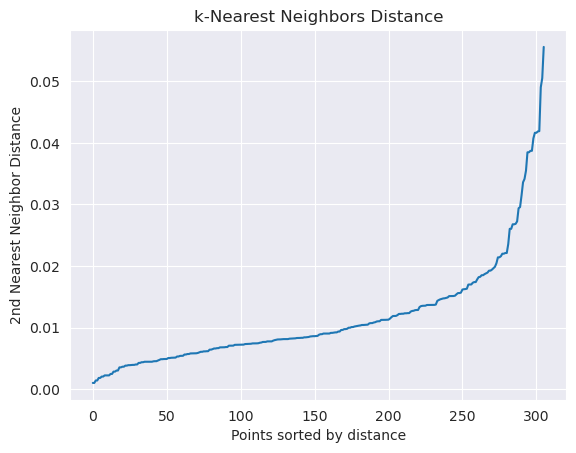

eps=0.01, min_samples=3, Silhouette Score=-0.27
eps=0.01, min_samples=5, Silhouette Score=-0.32
eps=0.02, min_samples=3, Silhouette Score=-0.02
eps=0.02, min_samples=5, Silhouette Score=0.37
eps=0.02, min_samples=10, Silhouette Score=0.29
eps=0.03, min_samples=3, Silhouette Score=0.26
eps=0.03, min_samples=5, Silhouette Score=0.46
eps=0.03, min_samples=10, Silhouette Score=0.44
eps=0.04, min_samples=3, Silhouette Score=0.37
eps=0.04, min_samples=5, Silhouette Score=0.47
eps=0.04, min_samples=10, Silhouette Score=0.47
eps=0.05, min_samples=3, Silhouette Score=0.48
eps=0.05, min_samples=5, Silhouette Score=0.48
eps=0.05, min_samples=10, Silhouette Score=0.48
eps=0.06, min_samples=3, Silhouette Score=0.25
eps=0.07, min_samples=10, Silhouette Score=0.50
Best Parameters: eps=0.07, min_samples=10
Best Silhouette Score: 0.50


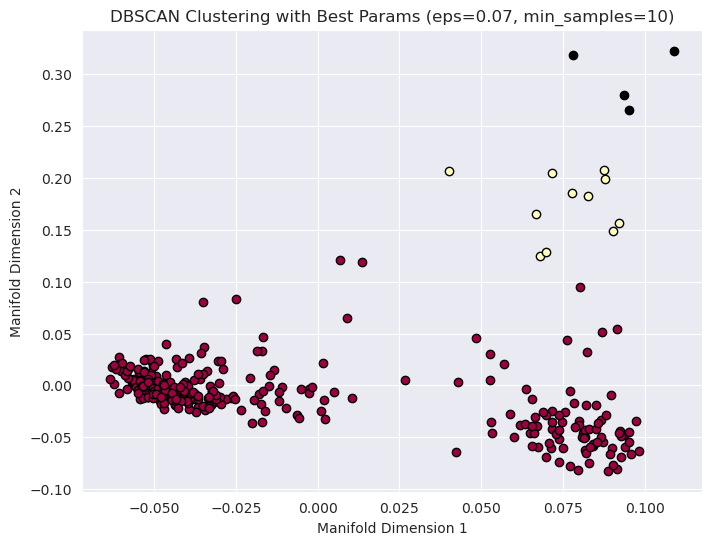

In [190]:
############## Hyperparameters Tuning for DBSCAN ############## 
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

manifold = embedding

# Step 1: Analyze the Distance Distribution
nn = NearestNeighbors(n_neighbors=2)
nn.fit(manifold)
distances, _ = nn.kneighbors(manifold)
distances = np.sort(distances[:, 1])  # Distance to the 2nd nearest neighbor
plt.plot(distances)
plt.title("k-Nearest Neighbors Distance")
plt.xlabel("Points sorted by distance")
plt.ylabel("2nd Nearest Neighbor Distance")
plt.show()

# Step 2: Grid Search for DBSCAN Parameters
eps_values = np.linspace(0.01, 0.1, 10)  # Adjust range based on the distance plot
min_samples_values = [3, 5, 10]
best_silhouette_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        # Run DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(manifold)

        # Calculate metrics only if there are clusters
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            silhouette = silhouette_score(manifold, labels)
            print(f"eps={eps:.2f}, min_samples={min_samples}, Silhouette Score={silhouette:.2f}")

            # Update best parameters
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_params = (eps, min_samples)

# Step 3: Print Best Parameters and Score
print(f"Best Parameters: eps={best_params[0]}, min_samples={best_params[1]}")
print(f"Best Silhouette Score: {best_silhouette_score:.2f}")

# Step 4: Run DBSCAN with Best Parameters and Visualize Results
dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
labels = dbscan.fit_predict(manifold)

# Visualize Clustering Results
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise

    class_member_mask = (labels == k)
    xy = manifold[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f"DBSCAN Clustering with Best Params (eps={best_params[0]}, min_samples={best_params[1]})")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.show()


Estimated number of clusters: 2
Estimated number of noise points: 73
Silhouette Score: 0.37


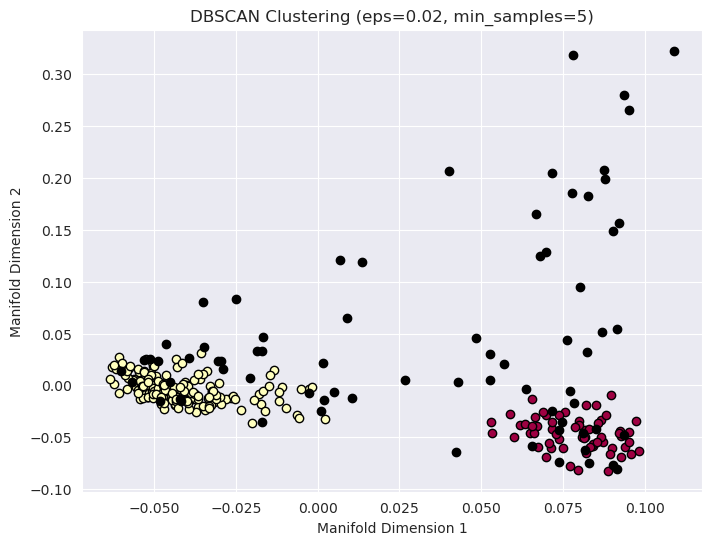

In [192]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

manifold = embedding

# Step 1: Set up DBSCAN parameters
eps = 0.02  # Distance for neighborhood
min_samples = 5  # Minimum points to form a cluster

# Step 2: Run DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(manifold)

# Step 3: Evaluate Clustering (optional, depending on labels)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# If more than one cluster is found, calculate silhouette score
if n_clusters > 1:
    silhouette = silhouette_score(manifold, labels)
    print(f"Silhouette Score: {silhouette:.2f}")

# Step 4: Visualize Clusters (for 2D or 3D manifold)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = manifold[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.show()


min_cluster_size=5, min_samples=None, cluster_selection_epsilon=0.0, Silhouette Score=0.42
min_cluster_size=5, min_samples=None, cluster_selection_epsilon=0.1, Silhouette Score=0.48
min_cluster_size=5, min_samples=None, cluster_selection_epsilon=0.2, Silhouette Score=0.48
min_cluster_size=5, min_samples=3, cluster_selection_epsilon=0.0, Silhouette Score=0.14
min_cluster_size=5, min_samples=3, cluster_selection_epsilon=0.1, Silhouette Score=0.47
min_cluster_size=5, min_samples=3, cluster_selection_epsilon=0.2, Silhouette Score=0.47
min_cluster_size=5, min_samples=5, cluster_selection_epsilon=0.0, Silhouette Score=0.42
min_cluster_size=5, min_samples=5, cluster_selection_epsilon=0.1, Silhouette Score=0.48
min_cluster_size=5, min_samples=5, cluster_selection_epsilon=0.2, Silhouette Score=0.48
min_cluster_size=5, min_samples=10, cluster_selection_epsilon=0.0, Silhouette Score=0.40
min_cluster_size=5, min_samples=10, cluster_selection_epsilon=0.1, Silhouette Score=0.47
min_cluster_size=5, m

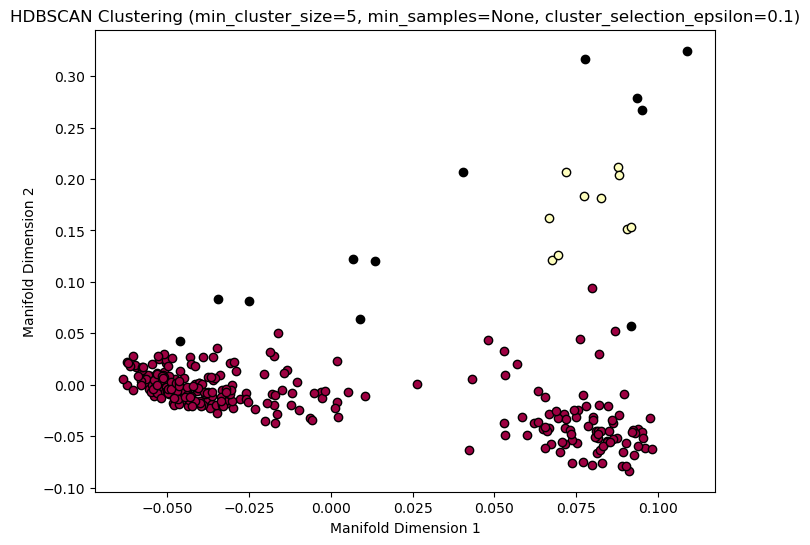

In [9]:
############## Hyperparameters Tuning for HDBSCAN ############## 
import numpy as np
from hdbscan import HDBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

manifold = embedding

# Step 1: Define parameter ranges for tuning
min_cluster_size_values = [5, 10, 15, 20]  # Minimum size of clusters
min_samples_values = [None, 3, 5, 10]       # Minimum samples for core points
cluster_selection_epsilon_values = [0.0, 0.1, 0.2]  # Additional flexibility for cluster separation

best_silhouette_score = -1
best_params = None

# Step 2: Perform grid search
for min_cluster_size in min_cluster_size_values:
    for min_samples in min_samples_values:
        for cluster_selection_epsilon in cluster_selection_epsilon_values:
            # Initialize HDBSCAN with the current parameters
            hdbscan = HDBSCAN(
                min_cluster_size=min_cluster_size,
                min_samples=min_samples,
                cluster_selection_epsilon=cluster_selection_epsilon
            )

            # Fit and predict labels
            labels = hdbscan.fit_predict(manifold)

            # Ignore cases where no valid clusters are found
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters > 1:
                # Calculate Silhouette Score
                silhouette = silhouette_score(manifold, labels)
                print(f"min_cluster_size={min_cluster_size}, min_samples={min_samples}, "
                      f"cluster_selection_epsilon={cluster_selection_epsilon}, "
                      f"Silhouette Score={silhouette:.2f}")

                # Update best score and parameters
                if silhouette > best_silhouette_score:
                    best_silhouette_score = silhouette
                    best_params = {
                        'min_cluster_size': min_cluster_size,
                        'min_samples': min_samples,
                        'cluster_selection_epsilon': cluster_selection_epsilon
                    }

# Step 3: Print the best parameters and score
if best_params:
    print("\nBest Parameters:")
    print(f"  min_cluster_size: {best_params['min_cluster_size']}")
    print(f"  min_samples: {best_params['min_samples']}")
    print(f"  cluster_selection_epsilon: {best_params['cluster_selection_epsilon']}")
    print(f"Best Silhouette Score: {best_silhouette_score:.2f}")
else:
    print("No valid clusters were found with the provided parameter ranges.")

# Step 4: Visualize clustering with the best parameters
if best_params:
    hdbscan = HDBSCAN(
        min_cluster_size=best_params['min_cluster_size'],
        min_samples=best_params['min_samples'],
        cluster_selection_epsilon=best_params['cluster_selection_epsilon']
    )
    labels = hdbscan.fit_predict(manifold)

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    plt.figure(figsize=(8, 6))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black for noise
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)
        xy = manifold[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title(f"HDBSCAN Clustering (min_cluster_size={best_params['min_cluster_size']}, "
              f"min_samples={best_params['min_samples']}, "
              f"cluster_selection_epsilon={best_params['cluster_selection_epsilon']})")
    plt.xlabel("Manifold Dimension 1")
    plt.ylabel("Manifold Dimension 2")
    plt.show()


Estimated number of clusters: 3
Estimated number of noise points: 8
Silhouette Score: 0.44


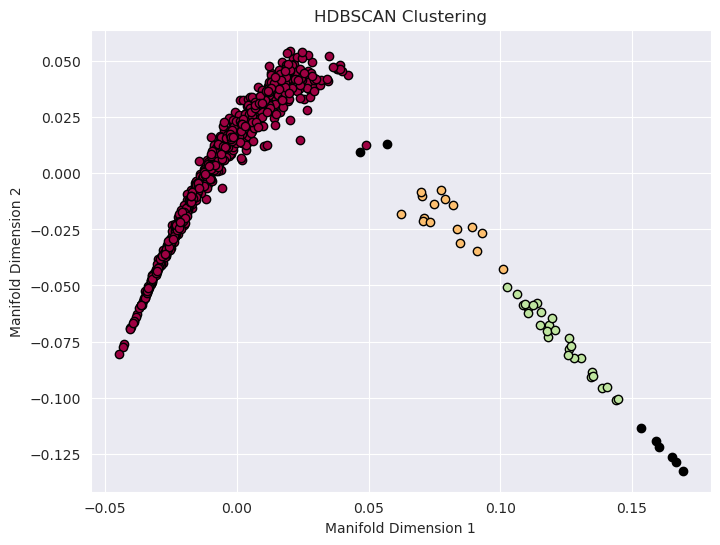

In [101]:
import numpy as np
import pandas as pd
import hdbscan
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Example: Assume `manifold` is a 2D or 3D array-like object (from LLE output)
manifold = embedding
# manifold = manifold_all
# Step 1: Initialize HDBSCAN with parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5, cluster_selection_epsilon=0.005)

# Step 2: Fit HDBSCAN
clusterer.fit(manifold)
labels = clusterer.labels_

# Step 3: Evaluate clustering
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# If more than one cluster is found, calculate silhouette score
if n_clusters > 1:
    silhouette = silhouette_score(manifold, labels)
    print(f"Silhouette Score: {silhouette:.2f}")

# Step 4: Visualize clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = manifold[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title("HDBSCAN Clustering")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.show()


In [74]:
X

X10339_48  X11105_171  X11510_31  X13090_17  X14116_129  X2201_17  \
SID                                                                         
10062C     6274.1     47049.6    43046.1     5100.6      2520.1   80172.2   
10062C     2646.7      9805.4    36470.0     3258.5      2767.4   88272.7   
10062C    11002.4     15502.6    14270.2     1844.0      2103.9   14434.0   
10077P     6419.4     10349.5    53052.6     3769.6      2782.2   77843.0   
10077P     1895.8      5356.0    36965.1     2510.2      2131.4   76094.5   
...           ...         ...        ...        ...         ...       ...   
21449L     3031.2      6816.8    34293.6     1642.3      2351.4   80228.4   
21449L    13493.7     13202.3    15621.2     1605.6      2012.4   14873.1   
22660M     4657.4     47978.0    38742.3     4482.7      2625.1   71015.4   
22660M     2736.7      4004.1    35580.1     3021.9      2784.5   81132.2   
22660M     8942.6     10973.2    17878.5     1829.6      1805.7   11887.9   

        X2418_55  X2579_17  X2602_2  X2609_59  ...  X5358_3  X5440_26  \
SID                                            ...                      
10062C   56127.4   15290.1    168.6    2100.4  ...   4915.8    4351.7   
10062C   34986.8   27374.2    204.6    2254.7  ...   5620.2    5629.0   
10062C    5760.9   11805.9  18877.2    2704.8  ...   7474.2    5194.6   
10077P   46411.8   12775.3    121.7    1938.0  ...   5994.8    4237.2   
10077P   63130.9   24811.9    148.0    1925.1  ...  10339.6    3813.5   
...          ...       ...      ...       ...  ...      ...       ...   
21449L   39769.7   21802.2    201.9    2200.7  ...   7336.9    2299.0   
21449L    5186.3    9515.8  13753.1    2390.8  ...   7376.4    2095.7   
22660M   72937.6   21938.5    123.6    2466.5  ...   6265.9    9558.1   
22660M   67534.2   19306.5    121.6    2525.5  ...   8604.1    6259.8   
22660M    5631.3   13793.9   9902.4    2706.1  ...   8414.4    5893.5   

        X5451_1  X5456_59  X5465_32  X5483_1  X5843_60  X6641_60  X7655_11  \
SID                                                                          
10062C  13583.3    5893.0    2174.4  17658.7     536.7    3119.1    2065.0   
10062C  12577.5    4524.5    2115.6  15949.6     459.2    3194.0   12443.4   
10062C   8049.7    4715.0    1031.9   7634.9    1421.6    1206.1   11057.2   
10077P  18476.6    8700.4    3281.0  17956.3     594.6    3324.0    5723.3   
10077P  17033.6    6816.7    2943.0  16614.2     655.7    2119.5    9524.2   
...         ...       ...       ...      ...       ...       ...       ...   
21449L  19332.0    5866.5    2626.4  16886.7     480.3    1484.7   18393.2   
21449L  10075.9    7174.9    1275.8   7879.4    1575.9     748.6   32826.5   
22660M  16462.5    6855.7    3060.5  18883.1     578.6    2525.0    3187.9   
22660M  16253.2    4877.6    2768.1  17648.1     685.2    2527.7    5513.0   
22660M  10015.6    5311.8    1419.0   9137.9    1508.4     782.1    5080.2   

        age_visit  
SID                
10062C       64.6  
10062C       70.0  
10062C       74.8  
10077P       62.4  
10077P       67.8  
...           ...  
21449L       68.1  
21449L       72.5  
22660M       72.6  
22660M       77.5  
22660M       82.3  

[306 rows x 86 columns]

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert gender to a NumPy array for element-wise comparison
visit = np.array(COPDGene_clinical_dataset['visitnum'].tolist())

# Initialize a dictionary to store cluster and visit counts
cluster_visit_counts = {}

# Step 4: Visualize clusters with sex and shapes
plt.figure(figsize=(10, 8))

# Assign distinct shapes for clusters
shapes = ['o', 's', 'D', '^', 'v']  # Extend as needed for more clusters
colors = {1: 'blue', 2: 'red', 3: 'green'}  # Define colors for visit

unique_labels = set(labels)

for k, shape in zip(unique_labels, shapes):
    cluster_visit_counts[k] = {'Visit1': 0, 'Visit2': 0, 'Visit3': 0}

    # Handle noise cluster
    if k == -1:
        color = 'gray'
        shape = 'x'  # Unfilled marker for noise
        cluster_name = "Noise"
    else:
        cluster_name = f"Cluster {k}"

    class_member_mask = (labels == k)

    for visit_i, visit_name in zip([1, 2, 3], ['Visit1', 'Visit2', 'Visit3']):
        visit_mask = (visit == visit_i)  # Perform element-wise comparison
        final_mask = class_member_mask & visit_mask  # Combine masks

        xy = manifold[final_mask]  # Apply mask to manifold

        # Count males and females in the cluster
        cluster_visit_counts[k][visit_name] += np.sum(final_mask)

        # Set edgecolor only for filled markers
        if shape in ['o', 's', 'D', '^', 'v']:
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[visit_i],
                        edgecolor='k', s=60, label=f"{cluster_name} (Visit {visit_i})" if k != -1 else "Noise")
        else:  # Unfilled marker
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[visit_i],
                        s=60, label=f"{cluster_name} (Gender {visit_i})" if k != -1 else "Noise")

# Add title and legend
plt.title("HDBSCAN Clustering with Sex Coloring")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Create a DataFrame from the cluster_visit_counts dictionary
cluster_visit_df = pd.DataFrame(cluster_visit_counts).T.reset_index()
cluster_visit_df.columns = ['Cluster', 'Visit1', 'Visit2', 'Visit3']

# Display the table
print("Visit Counts per Cluster:")
print(cluster_visit_df)

ValueError: operands could not be broadcast together with shapes (965,) (21794,) 

<Figure size 1000x800 with 0 Axes>

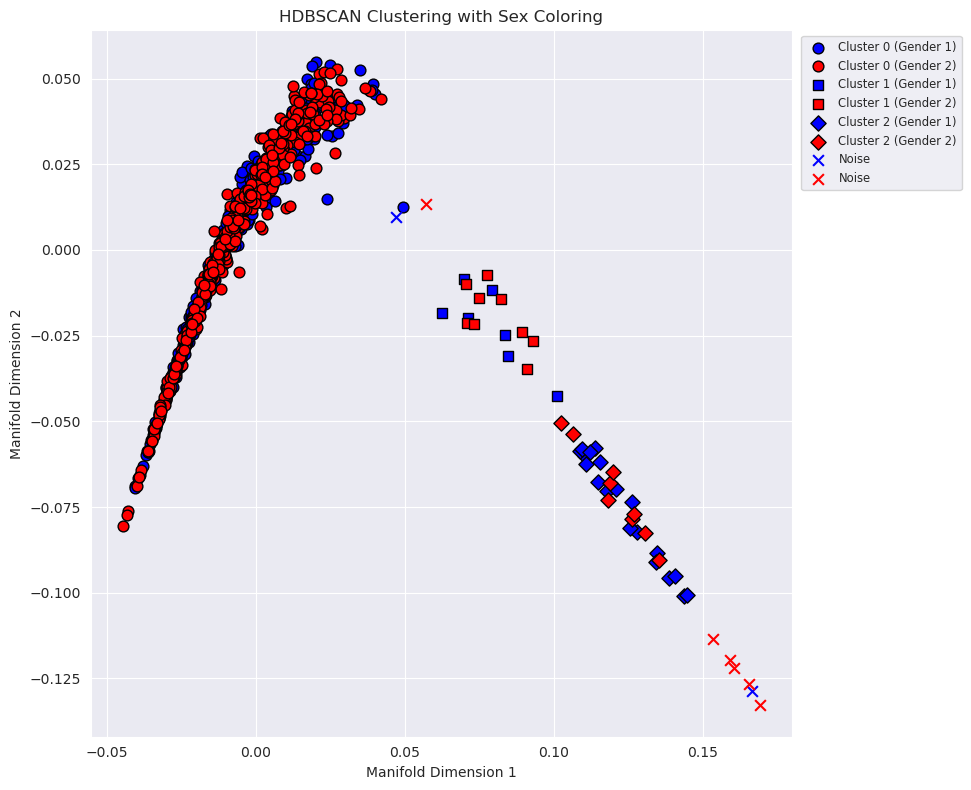

Gender Counts per Cluster:
   Cluster  Male  Female
0        0   450     463
1        1     7       9
2        2    19       9
3       -1     2       6


In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert gender to a NumPy array for element-wise comparison
gender = np.array(COPDGene_clinical_dataset['gender'].tolist())
gender = np.array(COPDGene_clinical_dataset_P2['gender'].tolist())

# Initialize a dictionary to store cluster and gender counts
cluster_gender_counts = {}

# Step 4: Visualize clusters with sex and shapes
plt.figure(figsize=(10, 8))

# Assign distinct shapes for clusters
shapes = ['o', 's', 'D', '^', 'v']  # Extend as needed for more clusters
colors = {1: 'blue', 2: 'red'}  # Define colors for gender

unique_labels = set(labels)

for k, shape in zip(unique_labels, shapes):
    cluster_gender_counts[k] = {'Male': 0, 'Female': 0}

    # Handle noise cluster
    if k == -1:
        color = 'gray'
        shape = 'x'  # Unfilled marker for noise
        cluster_name = "Noise"
    else:
        cluster_name = f"Cluster {k}"

    class_member_mask = (labels == k)

    for gender_i, gender_name in zip([1, 2], ['Male', 'Female']):
        gender_mask = (gender == gender_i)  # Perform element-wise comparison
        final_mask = class_member_mask & gender_mask  # Combine masks

        xy = manifold[final_mask]  # Apply mask to manifold

        # Count males and females in the cluster
        cluster_gender_counts[k][gender_name] += np.sum(final_mask)

        # Set edgecolor only for filled markers
        if shape in ['o', 's', 'D', '^', 'v']:
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[gender_i],
                        edgecolor='k', s=60, label=f"{cluster_name} (Gender {gender_i})" if k != -1 else "Noise")
        else:  # Unfilled marker
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[gender_i],
                        s=60, label=f"{cluster_name} (Gender {gender_i})" if k != -1 else "Noise")

# Add title and legend
plt.title("HDBSCAN Clustering with Sex Coloring")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Create a DataFrame from the cluster_gender_counts dictionary
cluster_gender_df = pd.DataFrame(cluster_gender_counts).T.reset_index()
cluster_gender_df.columns = ['Cluster', 'Male', 'Female']

# Display the table
print("Gender Counts per Cluster:")
print(cluster_gender_df)

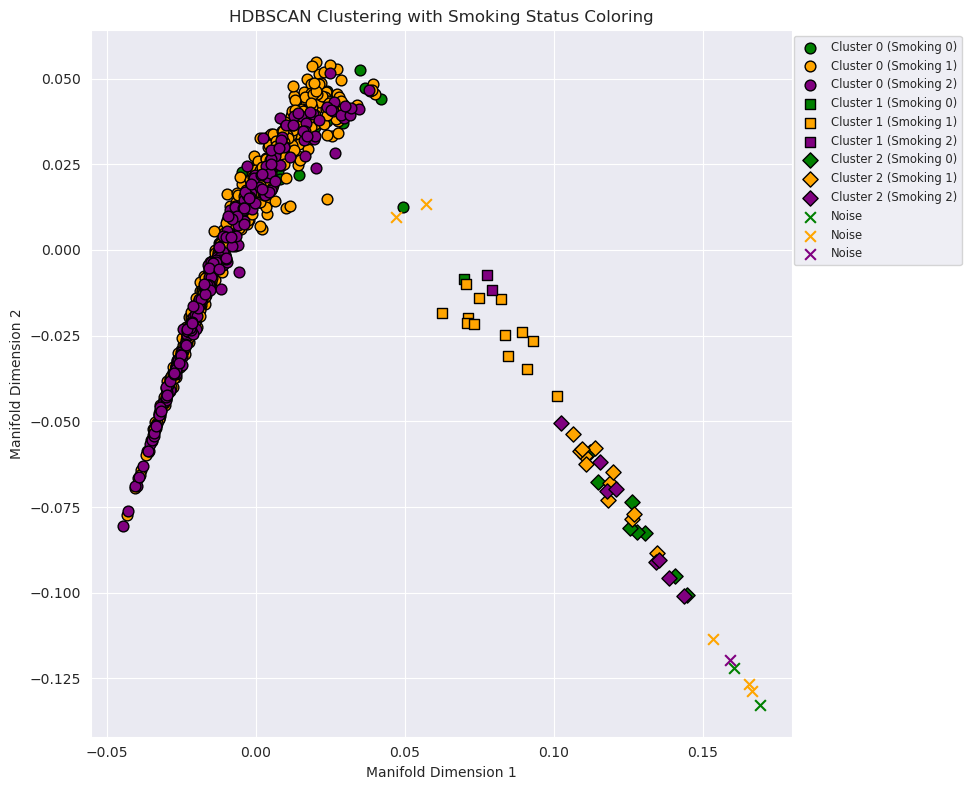

Smoking Status Counts per Cluster:
   Cluster  Never Smoked  Former Smoker  Current Smoker
0        0            54            656             203
1        1             1             13               2
2        2             8             12               8
3       -1             2              5               1


In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert smoking status to a NumPy array for element-wise comparison
smoking_status = np.array(COPDGene_clinical_dataset['smoking_status'].tolist())
smoking_status = np.array(COPDGene_clinical_dataset_P2['smoking_status'].tolist())

# Initialize a dictionary to store cluster and smoking status counts
cluster_smoking_counts = {}

# Step 4: Visualize clusters with smoking status and shapes
plt.figure(figsize=(10, 8))

# Assign distinct shapes for clusters
shapes = ['o', 's', 'D', '^', 'v']  # Extend as needed for more clusters
colors = {0: 'green', 1: 'orange', 2: 'purple'}  # Define colors for smoking status

unique_labels = set(labels)

for k, shape in zip(unique_labels, shapes):
    cluster_smoking_counts[k] = {'Never Smoked': 0, 'Former Smoker': 0, 'Current Smoker': 0}

    # Handle noise cluster
    if k == -1:
        color = 'gray'
        shape = 'x'  # Unfilled marker for noise
        cluster_name = "Noise"
    else:
        cluster_name = f"Cluster {k}"

    class_member_mask = (labels == k)

    for smoking_status_i, smoking_name in zip([0, 1, 2], ['Never Smoked', 'Former Smoker', 'Current Smoker']):
        smoking_mask = (smoking_status == smoking_status_i)  # Perform element-wise comparison
        final_mask = class_member_mask & smoking_mask  # Combine masks

        xy = manifold[final_mask]  # Apply mask to manifold

        # Count smoking status in the cluster
        cluster_smoking_counts[k][smoking_name] += np.sum(final_mask)

        # Set edgecolor only for filled markers
        if shape in ['o', 's', 'D', '^', 'v']:
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[smoking_status_i],
                        edgecolor='k', s=60, label=f"{cluster_name} (Smoking {smoking_status_i})" if k != -1 else "Noise")
        else:  # Unfilled marker
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[smoking_status_i],
                        s=60, label=f"{cluster_name} (Smoking {smoking_status_i})" if k != -1 else "Noise")

# Add title and legend
plt.title("HDBSCAN Clustering with Smoking Status Coloring")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Create a DataFrame from the cluster_smoking_counts dictionary
cluster_smoking_df = pd.DataFrame(cluster_smoking_counts).T.reset_index()
cluster_smoking_df.columns = ['Cluster', 'Never Smoked', 'Former Smoker', 'Current Smoker']

# Display the table
print("Smoking Status Counts per Cluster:")
print(cluster_smoking_df)

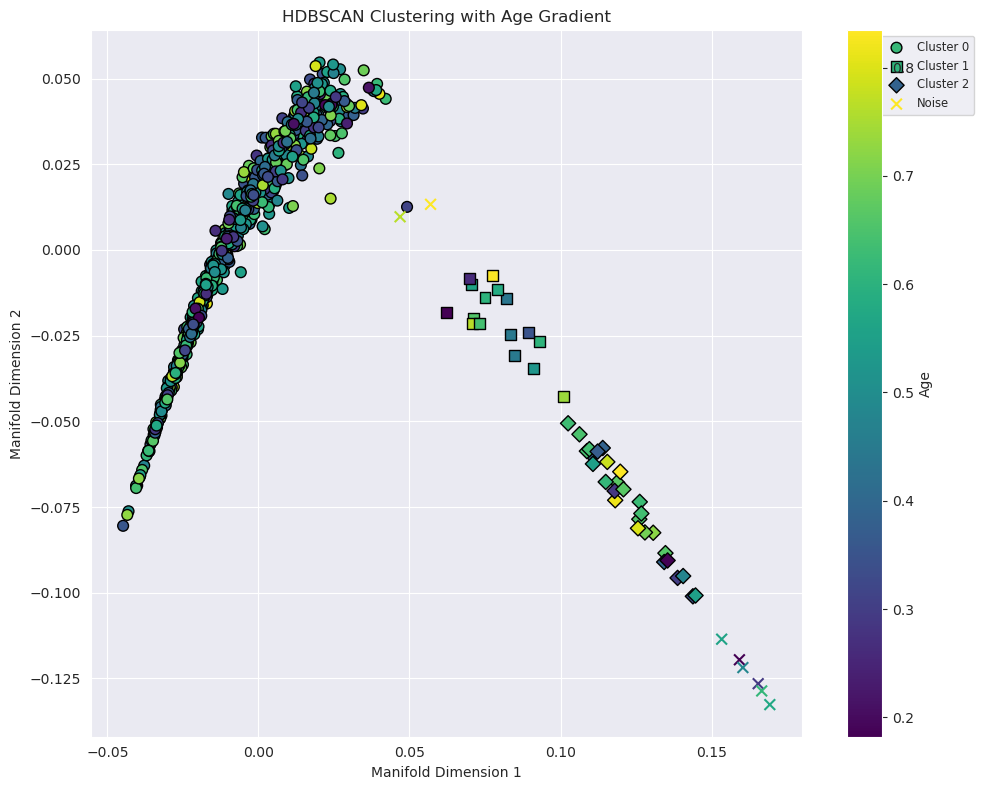

Age Statistics per Cluster:
   Cluster   Mean Age  Median Age  Min Age  Max Age  StdDev Age
0        0  67.438226       67.80     45.1     87.4    8.935357
1        1  69.993750       71.50     52.4     84.5    8.518397
2        2  70.717857       73.30     55.1     81.4    6.955576
3       -1  67.850000       69.05     52.8     80.4    8.682166


In [105]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

# Convert age to a NumPy array
age = np.array(COPDGene_clinical_dataset['age_visit'].tolist())
age = np.array(COPDGene_clinical_dataset_P2['age_visit'].tolist())

# Step 4: Visualize clusters with age and shapes
plt.figure(figsize=(10, 8))

# Assign distinct shapes for clusters
shapes = ['o', 's', 'D', '^', 'v']  # Extend as needed for more clusters
cmap = cm.viridis  # Color map for age gradient

unique_labels = set(labels)

# Initialize a dictionary to store age statistics for each cluster
cluster_age_stats = {}

# Create a scatter plot and keep a reference for the color bar
scatter = None

for k, shape in zip(unique_labels, shapes):
    # Handle noise cluster
    if k == -1:
        color = 'gray'
        shape = 'x'  # Unfilled marker for noise
        cluster_name = "Noise"
    else:
        cluster_name = f"Cluster {k}"

    class_member_mask = (labels == k)

    # Scatter plot for each cluster
    xy = manifold[class_member_mask]  # Points in the cluster
    ages = age[class_member_mask]  # Corresponding ages

    # Calculate age statistics for the cluster
    cluster_age_stats[k] = {
        "Mean": np.mean(ages),
        "Median": np.median(ages),
        "Min": np.min(ages),
        "Max": np.max(ages),
        "StdDev": np.std(ages)
    }

    # Map ages to colors
    normalized_ages = (ages - age.min()) / (age.max() - age.min())  # Normalize ages for colormap
    scatter = plt.scatter(xy[:, 0], xy[:, 1], marker=shape, c=normalized_ages, cmap=cmap,
                          edgecolor='k' if shape in ['o', 's', 'D', '^', 'v'] else None,
                          s=60, label=f"{cluster_name}" if k != -1 else "Noise")

# Add color bar using the scatter plot's colormap and normalization
cbar = plt.colorbar(scatter)
cbar.set_label('Age')

# Add title and legend
plt.title("HDBSCAN Clustering with Age Gradient")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Create a DataFrame for the cluster age statistics
cluster_age_df = pd.DataFrame(cluster_age_stats).T.reset_index()
cluster_age_df.columns = ['Cluster', 'Mean Age', 'Median Age', 'Min Age', 'Max Age', 'StdDev Age']

# Display the table
print("Age Statistics per Cluster:")
print(cluster_age_df)

In [14]:
###### Other Clinical Variables ######
COPDGene_clinical_dataset['AWT_seg_Thirona'].unique() 
# Waist_CM -> Continuous
# distwalked -> Continous
# 'race', 'BMI', 'Waist_CM',
#                            'Chronic_Bronchitis', 'PRM_pct_airtrapping_Thirona', 'PRM_pct_emphysema_Thirona',
#                            'PRM_pct_normal_Thirona', 'Pi10_Thirona', 'AWT_seg_Thirona', 'WallAreaPct_seg_Thirona',
#                            'DLco_GLI_tr_pp', 'FRC_TLC_ratio_Thirona', 'distwalked', 'SF36_PCS_score',
#                            'SF36_MCS_score', 'comorbidities']


array([1.04242173, 0.99881799, 1.066199  , 0.95660257, 0.91113544,
       0.93971867, 1.23834768, 1.12175923, 1.02926533, 0.83519921,
       0.73628671, 0.7086315 , 0.76547786, 0.82537033, 0.78906717,
       0.75140516, 0.74650792, 0.69995633, 1.22618127, 1.15875512,
       1.07213383, 0.95432234, 0.88294753, 0.8925622 , 1.2850525 ,
       1.22074549, 1.34541683, 0.94395633, 0.93901028, 0.903578  ,
       0.98267478, 1.05386424, 1.01244933, 0.99846556, 0.95622488,
       0.85662733, 0.89992161, 1.05096224, 1.25204133, 0.83038921,
       0.8489761 , 0.91674567, 1.43809613, 1.63166757, 1.14294833,
       1.13354464, 1.16744682, 1.080107  , 0.74256275, 0.88873564,
       0.97916667, 0.84502475, 0.74002748, 0.962324  , 1.25722634,
       1.09424841, 1.09099717, 1.15307298, 1.27811826, 1.27248233,
       1.04515846, 1.16298628, 1.16651917, 0.95363963, 0.98978839,
       0.99252633, 0.94775233, 0.89674714, 1.13192167, 1.24145353,
       1.26658715, 1.2893915 , 1.18479629, 1.19357335, 1.22679

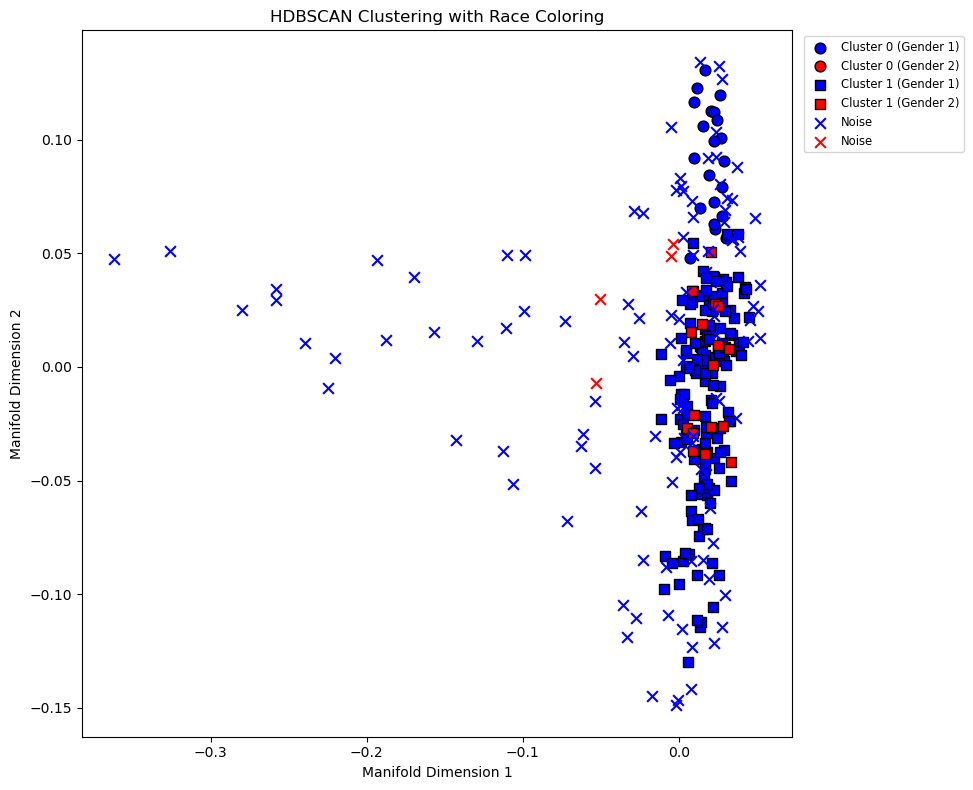

Race Counts per Cluster:
   Cluster  White  African American
0        0     21                 0
1        1    151                17
2       -1    113                 4


In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert race to a NumPy array for element-wise comparison
race = np.array(COPDGene_clinical_dataset['race'].tolist())

# Initialize a dictionary to store cluster and gender counts
cluster_race_counts = {}

# Step 4: Visualize clusters with sex and shapes
plt.figure(figsize=(10, 8))

# Assign distinct shapes for clusters
shapes = ['o', 's', 'D', '^', 'v']  # Extend as needed for more clusters
colors = {1: 'blue', 2: 'red'}  # Define colors for race

unique_labels = set(labels)

for k, shape in zip(unique_labels, shapes):
    cluster_race_counts[k] = {'White': 0, 'African American': 0}

    # Handle noise cluster
    if k == -1:
        color = 'gray'
        shape = 'x'  # Unfilled marker for noise
        cluster_name = "Noise"
    else:
        cluster_name = f"Cluster {k}"

    class_member_mask = (labels == k)

    for race_i, race_name in zip([1, 2], ['White', 'African American']):
        race_mask = (race == race_i)  # Perform element-wise comparison
        final_mask = class_member_mask & race_mask  # Combine masks

        xy = manifold[final_mask]  # Apply mask to manifold

        # Count males and females in the cluster
        cluster_race_counts[k][race_name] += np.sum(final_mask)

        # Set edgecolor only for filled markers
        if shape in ['o', 's', 'D', '^', 'v']:
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[race_i],
                        edgecolor='k', s=60, label=f"{cluster_name} (Gender {race_i})" if k != -1 else "Noise")
        else:  # Unfilled marker
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[race_i],
                        s=60, label=f"{cluster_name} (Gender {race_i})" if k != -1 else "Noise")

# Add title and legend
plt.title("HDBSCAN Clustering with Race Coloring")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Create a DataFrame from the cluster_race_counts dictionary
cluster_race_df = pd.DataFrame(cluster_race_counts).T.reset_index()
cluster_race_df.columns = ['Cluster', 'White', 'African American']

# Display the table
print("Race Counts per Cluster:")
print(cluster_race_df)

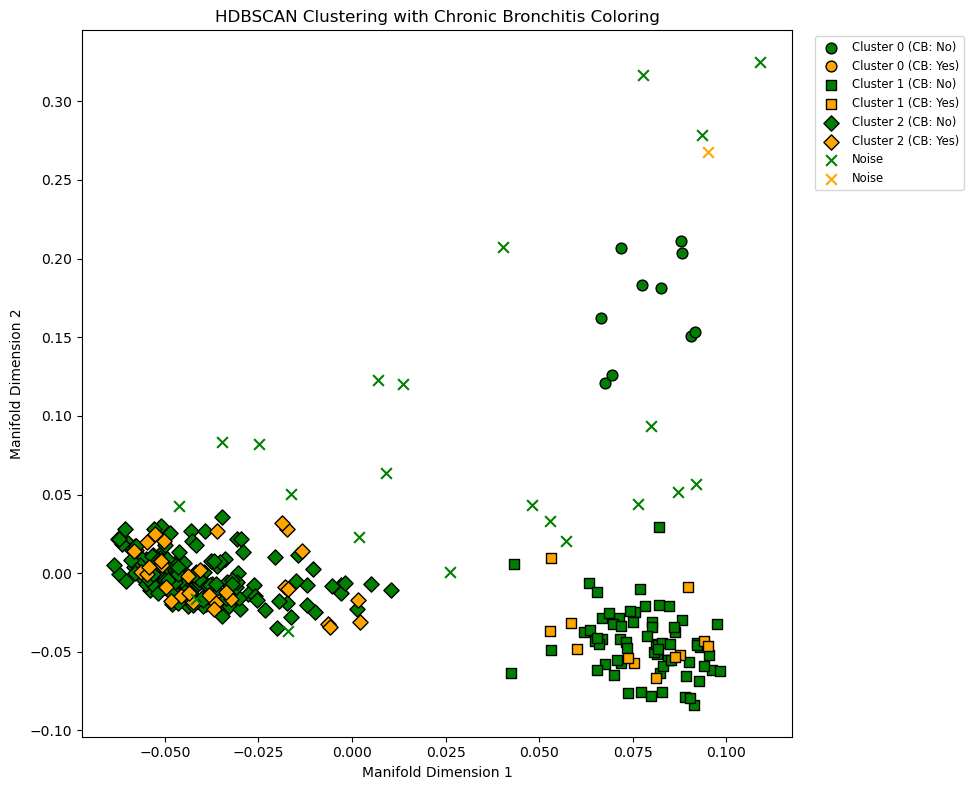

Chronic Bronchitis Counts per Cluster:
   Cluster   No  Yes
0        0   10    0
1        1   68   12
2        2  162   31
3       -1   22    1


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert Chronic_Bronchitis to a NumPy array for element-wise comparison
chronic_bronchitis = np.array(COPDGene_clinical_dataset['Chronic_Bronchitis'].tolist())

# Initialize a dictionary to store cluster and chronic bronchitis counts
cluster_cb_counts = {}

# Step 4: Visualize clusters with Chronic_Bronchitis and shapes
plt.figure(figsize=(10, 8))

# Assign distinct shapes for clusters
shapes = ['o', 's', 'D', '^', 'v']  # Extend as needed for more clusters
colors = {0: 'green', 1: 'orange'}  # Define colors for Chronic_Bronchitis (0: No, 1: Yes)

unique_labels = set(labels)

for k, shape in zip(unique_labels, shapes):
    cluster_cb_counts[k] = {'No': 0, 'Yes': 0}

    # Handle noise cluster
    if k == -1:
        color = 'gray'
        shape = 'x'  # Unfilled marker for noise
        cluster_name = "Noise"
    else:
        cluster_name = f"Cluster {k}"

    class_member_mask = (labels == k)

    for cb_status, cb_name in zip([0, 1], ['No', 'Yes']):
        cb_mask = (chronic_bronchitis == cb_status)  # Perform element-wise comparison
        final_mask = class_member_mask & cb_mask  # Combine masks

        xy = manifold[final_mask]  # Apply mask to manifold

        # Count "No" and "Yes" in the cluster
        cluster_cb_counts[k][cb_name] += np.sum(final_mask)

        # Set edgecolor only for filled markers
        if shape in ['o', 's', 'D', '^', 'v']:
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[cb_status],
                        edgecolor='k', s=60, label=f"{cluster_name} (CB: {cb_name})" if k != -1 else "Noise")
        else:  # Unfilled marker
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[cb_status],
                        s=60, label=f"{cluster_name} (CB: {cb_name})" if k != -1 else "Noise")

# Add title and legend
plt.title("HDBSCAN Clustering with Chronic Bronchitis Coloring")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Create a DataFrame from the cluster_cb_counts dictionary
cluster_cb_df = pd.DataFrame(cluster_cb_counts).T.reset_index()
cluster_cb_df.columns = ['Cluster', 'No', 'Yes']

# Display the table
print("Chronic Bronchitis Counts per Cluster:")
print(cluster_cb_df)

In [17]:
trimmed['cluster'] = labels
# Creating a SeqID -> TargetName Mapping
COPDGene_metadata = pd.read_csv('/home/shussein/NetCO/data/COPDGene/copdg_soma_5k_p3_meta_Jan23.csv', index_col=0)
seqID_targetName_mapping = dict(zip(COPDGene_metadata.index, COPDGene_metadata['TargetFullName']))
seqID_targetName_mapping

{'X10000_28': 'Beta-crystallin B2',
 'X10001_7': 'RAF proto-oncogene serine/threonine-protein kinase',
 'X10003_15': 'Zinc finger protein 41',
 'X10006_25': 'ETS domain-containing protein Elk-1',
 'X10008_43': 'Guanylyl cyclase-activating protein 1',
 'X10011_65': 'Inositol polyphosphate 5-phosphatase OCRL-1',
 'X10012_5': 'SAM pointed domain-containing Ets transcription factor',
 'X10014_31': 'Zinc finger protein SNAI2',
 'X10015_119': 'Voltage-gated potassium channel subunit beta-2',
 'X10022_207': 'DNA polymerase eta',
 'X10023_32': 'Vitamin D3 receptor',
 'X10024_44': '4-hydroxy-2-oxoglutarate aldolase, mitochondrial',
 'X10030_8': 'Adenine DNA glycosylase',
 'X10035_6': 'Dual specificity protein phosphatase 4',
 'X10036_201': 'Zinc fingers and homeoboxes protein 3',
 'X10037_98': 'Sialic acid-binding Ig-like lectin 12:Ig-like V-type 2 domain, Isoform long',
 'X10040_63': 'Tumor protein 63',
 'X10041_3': 'Hepatocyte nuclear factor 4-alpha',
 'X10042_8': 'Serine/threonine-protein ki

In [18]:
from itertools import combinations
# Interpreting the Clusters
# 1. Attempting to Develop Omics Profiles for the Clusters
import pandas as pd
from scipy.stats import ttest_ind
# Separate clusters
clusters = trimmed['cluster'].unique()
cluster_profiles = {}

# Compute summary statistics
for cluster in clusters:
    cluster_data = trimmed[trimmed['cluster'] == cluster]
    cluster_profiles[cluster] = cluster_data.describe()  # Mean, std, etc.

# Compare omics across clusters (pairwise t-test)
omics_features = [col for col in trimmed.columns if col.startswith('X')]
stats = []
for omics in omics_features:
    for c1, c2 in combinations(clusters, 2):
        cluster1_data = trimmed[trimmed['cluster'] == c1][omics]
        cluster2_data = trimmed[trimmed['cluster'] == c2][omics]
        t_stat, p_value = ttest_ind(cluster1_data, cluster2_data, equal_var=False)
        stats.append({'Omics': omics, 'Cluster1': c1, 'Cluster2': c2, 'p-value': p_value})

# Convert results to DataFrame and filter significant omics
stats_df = pd.DataFrame(stats)
stats_df['TargetFullName'] = stats_df['Omics'].map(seqID_targetName_mapping)
significant_omics = stats_df[stats_df['p-value'] < 0.05]
significant_omics

Omics  Cluster1  Cluster2       p-value  \
9     X5358_3         2         1  4.142552e-05   
10    X5358_3         2         0  1.519496e-02   
13   X5315_22        -1         1  3.213818e-02   
14   X5315_22        -1         0  1.452298e-03   
15   X5315_22         2         1  6.069860e-19   
..        ...       ...       ...           ...   
174  X3853_56        -1         2  8.927006e-03   
175  X3853_56        -1         1  1.883432e-04   
177  X3853_56         2         1  3.056919e-47   
178  X3853_56         2         0  1.855717e-06   
179  X3853_56         1         0  2.463122e-08   

                        TargetFullName  
9                         Osteomodulin  
10                        Osteomodulin  
13          Troponin T, cardiac muscle  
14          Troponin T, cardiac muscle  
15          Troponin T, cardiac muscle  
..                                 ...  
174  Malate dehydrogenase, cytoplasmic  
175  Malate dehydrogenase, cytoplasmic  
177  Malate dehydrogenase, cytoplasmic  
178  Malate dehydrogenase, cytoplasmic  
179  Malate dehydrogenase, cytoplasmic  

[100 rows x 5 columns]

In [19]:
# Create a dictionary to store significant omics for each pair of clusters
significant_omics_between_clusters = {}

# Iterate over all pairs of clusters
for c1, c2 in combinations(clusters, 2):
    # Filter rows in stats_df where the comparison is between the current pair of clusters
    pairwise_comparison = stats_df[
        ((stats_df['Cluster1'] == c1) & (stats_df['Cluster2'] == c2)) |
        ((stats_df['Cluster1'] == c2) & (stats_df['Cluster2'] == c1))
        ]

    # Filter significant omics (p-value < 0.05)
    significant_for_pair = pairwise_comparison[pairwise_comparison['p-value'] < 0.05]

    # Extract the significant omics
    omics_significant = significant_for_pair['Omics'].unique()

    # Add the results to the dictionary
    significant_omics_between_clusters[f"{c1} vs {c2}"] = omics_significant

# Flatten the dictionary into a list of rows for each pair and omics
flattened_data = [
    {"Cluster Pair": cluster_pair, "Significant Omics": omics}
    for cluster_pair, omics_list in significant_omics_between_clusters.items()
    for omics in omics_list
]

# Create the DataFrame from the flattened list
pairwise_summary = pd.DataFrame(flattened_data)
pairwise_summary

Cluster Pair Significant Omics
0       -1 vs 2          X3332_57
1       -1 vs 2          X3066_12
2       -1 vs 2          X4337_49
3       -1 vs 2          X4568_17
4       -1 vs 2          X4541_49
..          ...               ...
95       1 vs 0        X11105_171
96       1 vs 0           X3858_5
97       1 vs 0          X5440_26
98       1 vs 0          X2647_66
99       1 vs 0          X3853_56

[100 rows x 2 columns]

In [20]:
cluster_comparison = significant_omics[(significant_omics['Cluster1'] == 1) &
                                       (significant_omics['Cluster2'] == 2)]
print("Significant features differentiating Cluster 0 and 1:")
print(cluster_comparison)


Significant features differentiating Cluster 0 and 1:
Empty DataFrame
Columns: [Omics, Cluster1, Cluster2, p-value, TargetFullName]
Index: []


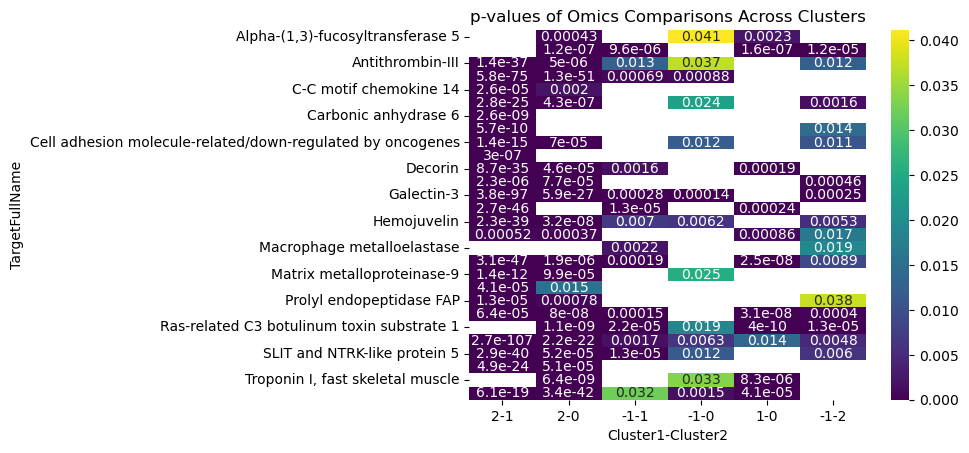

In [22]:
import seaborn as sns

heatmap_data = significant_omics.pivot(index='TargetFullName', columns=['Cluster1', 'Cluster2'], values='p-value')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2g")
plt.title("p-values of Omics Comparisons Across Clusters")
plt.show()


Top features defining clusters:
Ras-related C3 botulinum toxin substrate 1                  3.226167
Rab GDP dissociation inhibitor beta                         2.756164
Alpha-enolase                                               2.598981
Malate dehydrogenase, cytoplasmic                           2.299268
Low molecular weight phosphotyrosine protein phosphatase    2.260184
Galectin-3                                                  1.867866
Repulsive guidance molecule A                               1.813522
SLIT and NTRK-like protein 5                                1.712479
Apolipoprotein E                                            1.602934
Gelsolin                                                    1.563891
dtype: float64


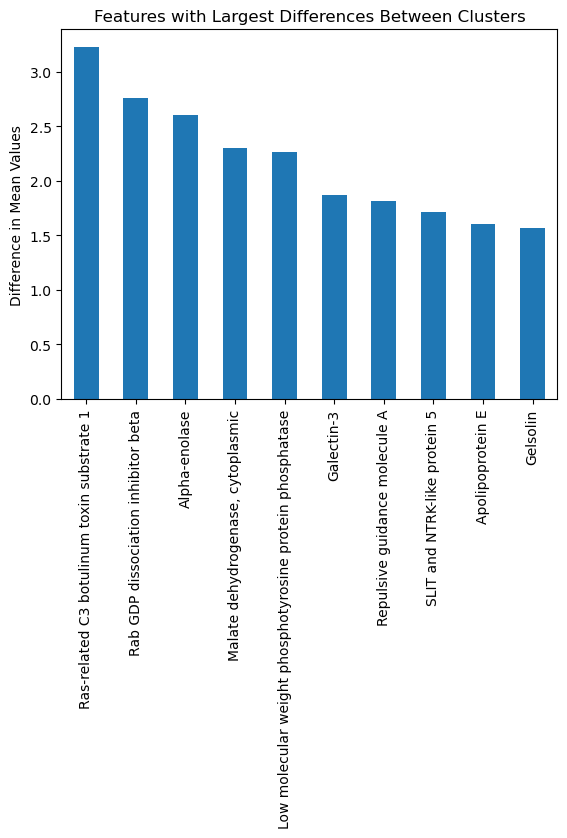

In [23]:
# Compute cluster centroids
centroids = trimmed.groupby('cluster')[omics_features].mean()

# Find features with largest differences between centroids
centroid_diff = centroids.max() - centroids.min()
top_features = centroid_diff.nlargest(10)

top_features = top_features.rename(index=seqID_targetName_mapping)
print("Top features defining clusters:")
print(top_features)

# Plot the differences
top_features.plot(kind='bar')
plt.title("Features with Largest Differences Between Clusters")
plt.ylabel("Difference in Mean Values")
plt.show()


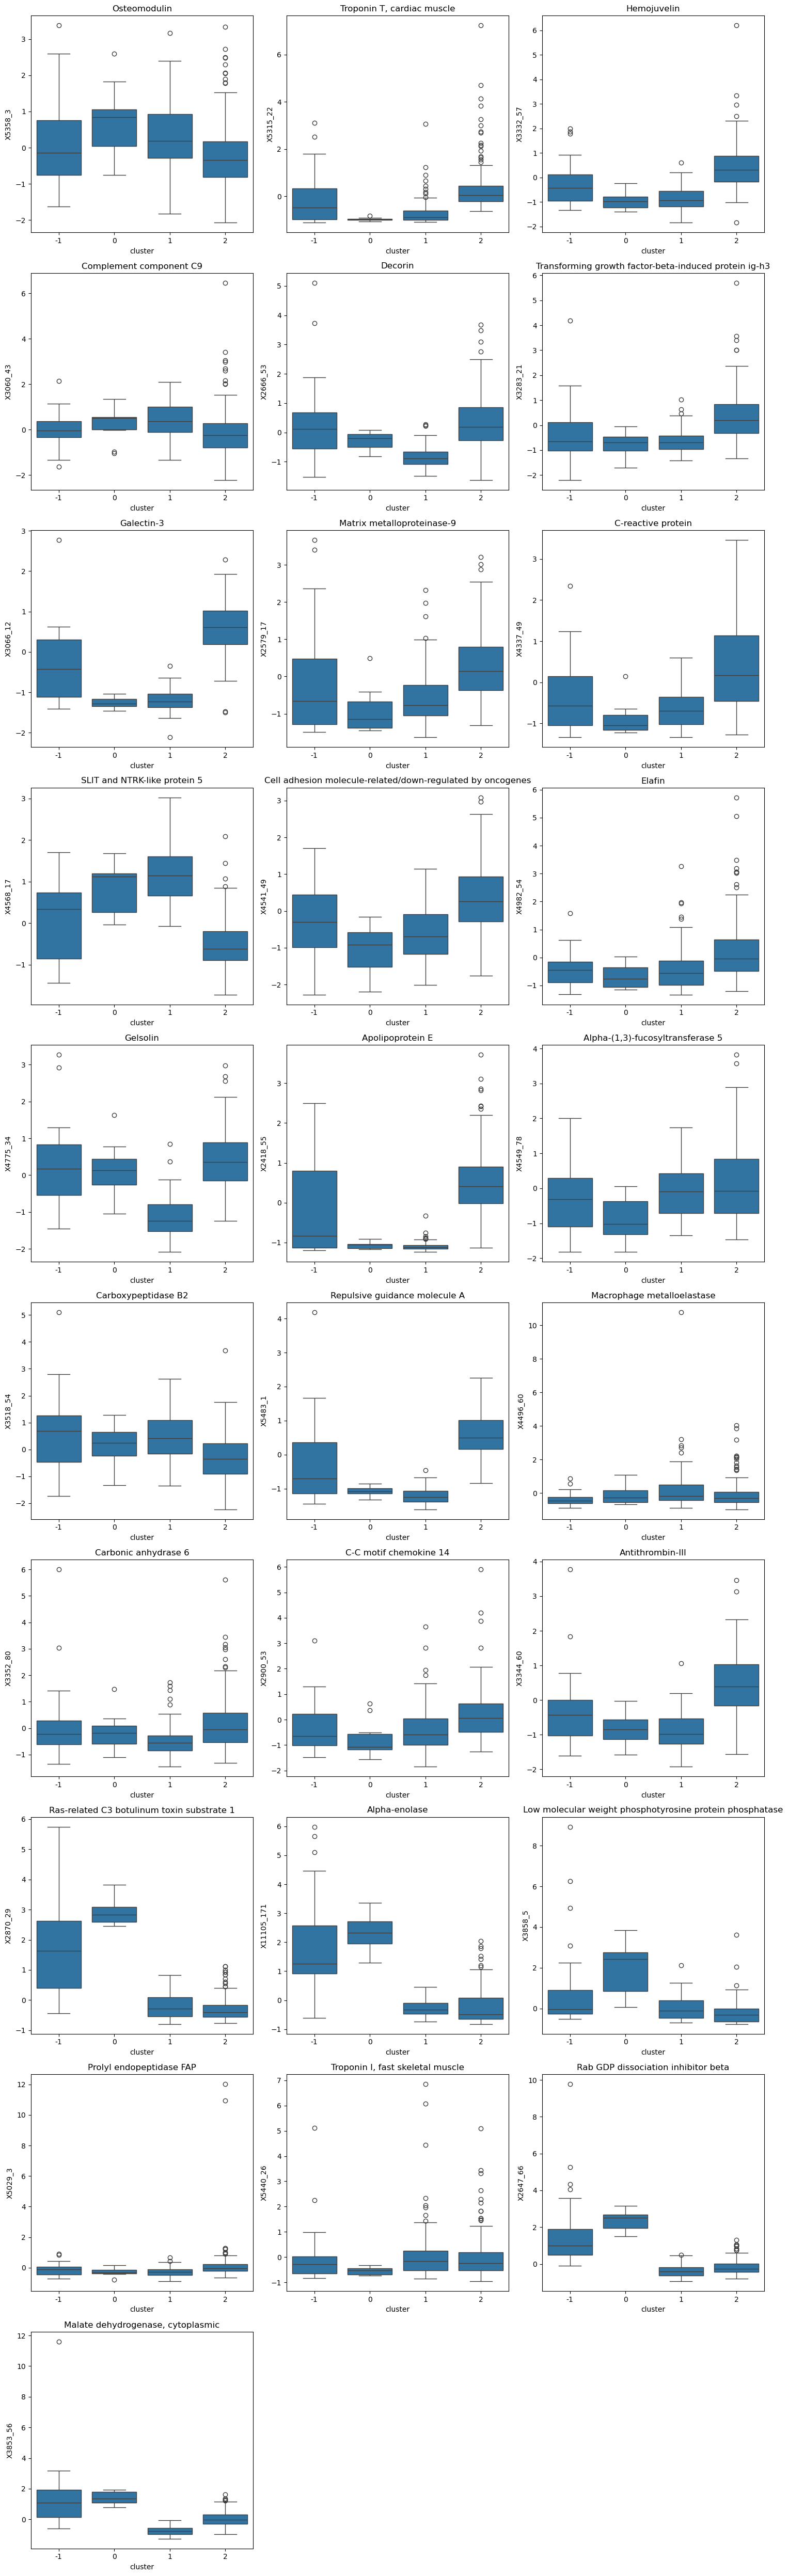

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Boxplots for significant omics features
significant_omics_list = significant_omics['Omics'].unique()

# Define the grid size (e.g., 3 plots per row)
n_cols = 3
n_rows = math.ceil(len(significant_omics_list) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Adjust figure size
axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Create a boxplot for each significant omics feature
for i, omics in enumerate(significant_omics_list):
    sns.boxplot(data=trimmed, x='cluster', y=omics, ax=axes[i])
    axes[i].set_title(f"{seqID_targetName_mapping[omics]}")

# Remove any empty subplots (if significant_omics_list isn't a multiple of n_cols)
for j in range(len(significant_omics_list), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [26]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import shap
import matplotlib.pyplot as plt

# Replacing -1 (Noise Points) with 2
trimmed['cluster'] = trimmed['cluster'].replace(-1, 3)

# Step 1: Train a model
X = trimmed.loc[:, ~trimmed.columns.isin(['cluster'])]
y = trimmed['cluster'].astype(int)      # Cluster labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

/home/shussein/anaconda3/envs/ManifoldLearning/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.88      1.00      0.94        15
           2       0.95      1.00      0.97        36
           3       0.50      0.38      0.43         8

    accuracy                           0.87        62
   macro avg       0.58      0.59      0.58        62
weighted avg       0.83      0.87      0.85        62



SHAP Summary Plot for Class 0


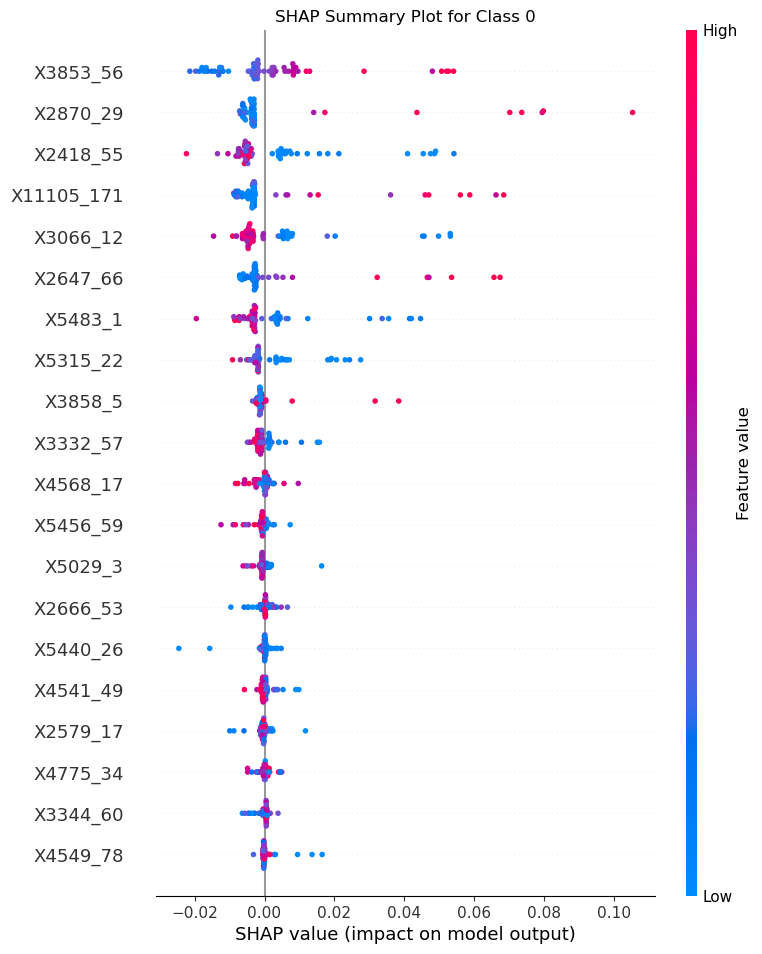

SHAP Summary Plot for Class 1


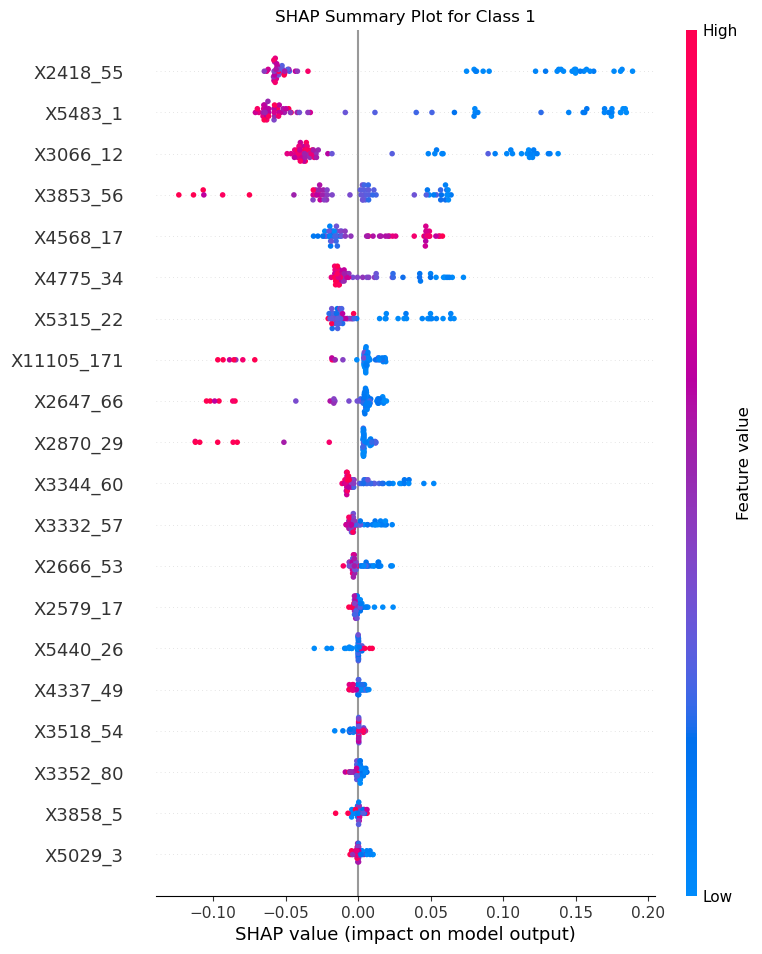

SHAP Summary Plot for Class 2


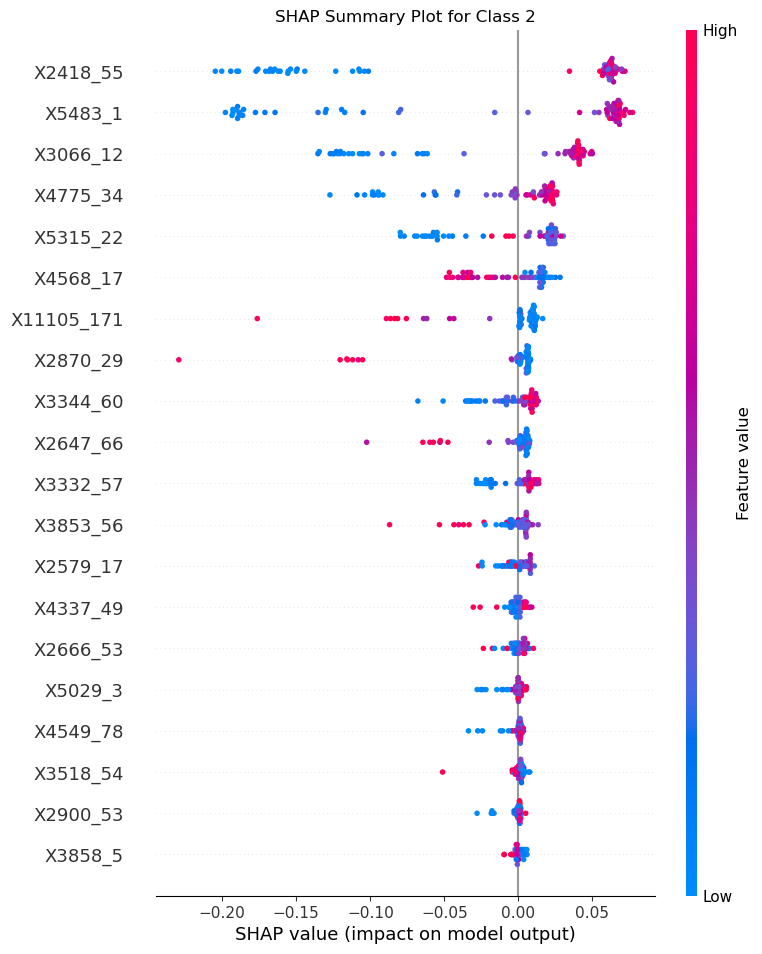

SHAP Summary Plot for Class 3


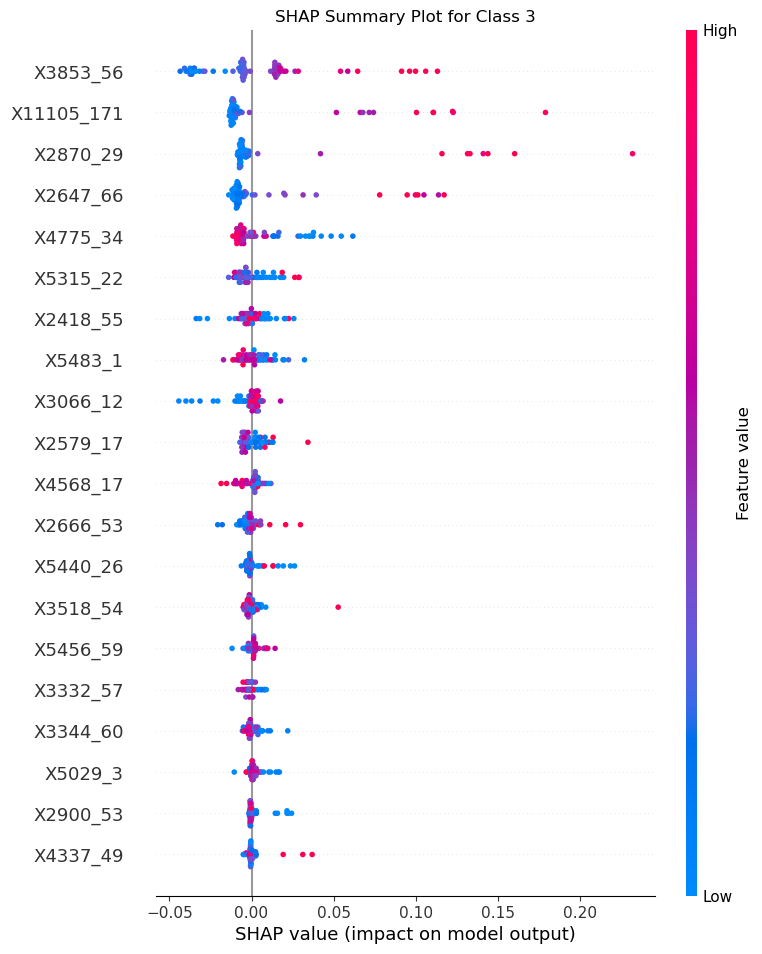

In [27]:
# SHAP explanation
explainer = shap.Explainer(rf_model, X_train)  # Use TreeExplainer for tree-based models
shap_values = explainer(X_test)
X_test_renamed = X_test.rename(columns=seqID_targetName_mapping)

# Summary plot for SHAP values (requires class-specific handling for multiclass)
for class_index in set(list(y_test.tolist())):
    print(f"SHAP Summary Plot for Class {class_index}")
    shap.summary_plot(shap_values[..., class_index], X_test_renamed, show=False)
    plt.title(f"SHAP Summary Plot for Class {class_index}")
    plt.show()

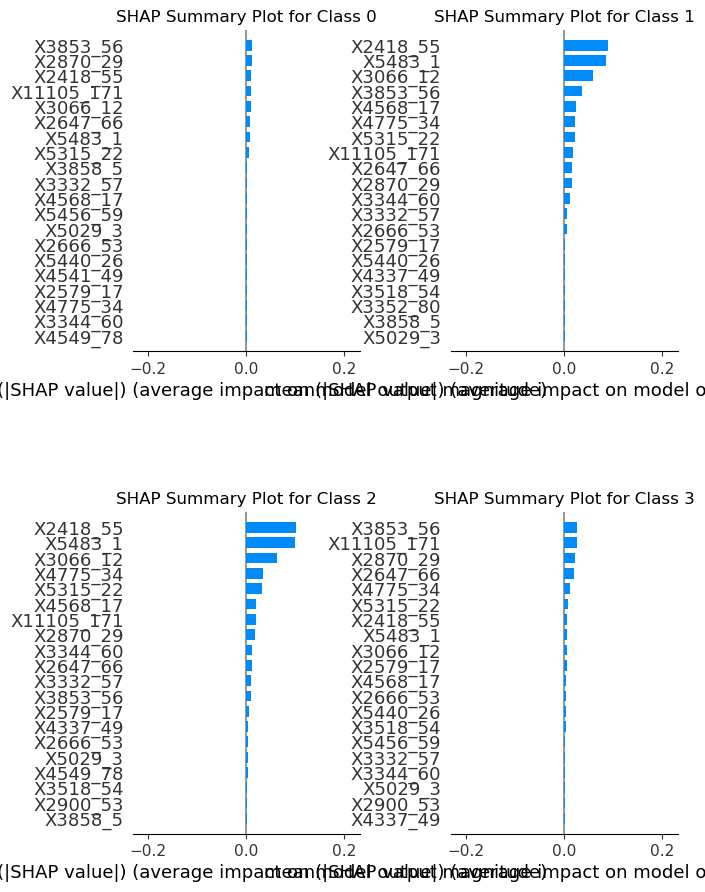

In [28]:
import matplotlib.pyplot as plt
import shap
import math

# SHAP explanation
explainer = shap.Explainer(rf_model, X_train)  # Use TreeExplainer for tree-based models
shap_values = explainer(X_test)

X_test_renamed = X_test.rename(columns=seqID_targetName_mapping)
# Number of classes
num_classes = len(set(y_test))

# Determine the global x-axis range
x_min = shap_values.values.min()
x_max = shap_values.values.max()

# Determine grid size: multiple rows with 2 plots per row
n_cols = 2  # Number of columns in the grid
n_rows = math.ceil(num_classes / n_cols)  # Compute rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows), sharex=True)

# Flatten axes for easier indexing if grid has multiple rows and columns
axes = axes.flatten()

# Plot SHAP summary plots for each class
for class_index, ax in zip(range(num_classes), axes):
    plt.sca(ax)  # Set the current axis for SHAP to draw on
    shap.summary_plot(
        shap_values[..., class_index],
        X_test_renamed,
        show=False,
        plot_type="bar"
    )
    ax.set_xlim(x_min, x_max)  # Set shared x-axis range
    ax.set_title(f"SHAP Summary Plot for Class {class_index}")

# Remove any empty axes (if num_classes is not a perfect multiple of n_cols)
for i in range(num_classes, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to accommodate long y-axis labels
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave room for titles and labels
plt.subplots_adjust(left=0.3, hspace=0.5, wspace=0.4)  # Increase space for y-labels
plt.show()

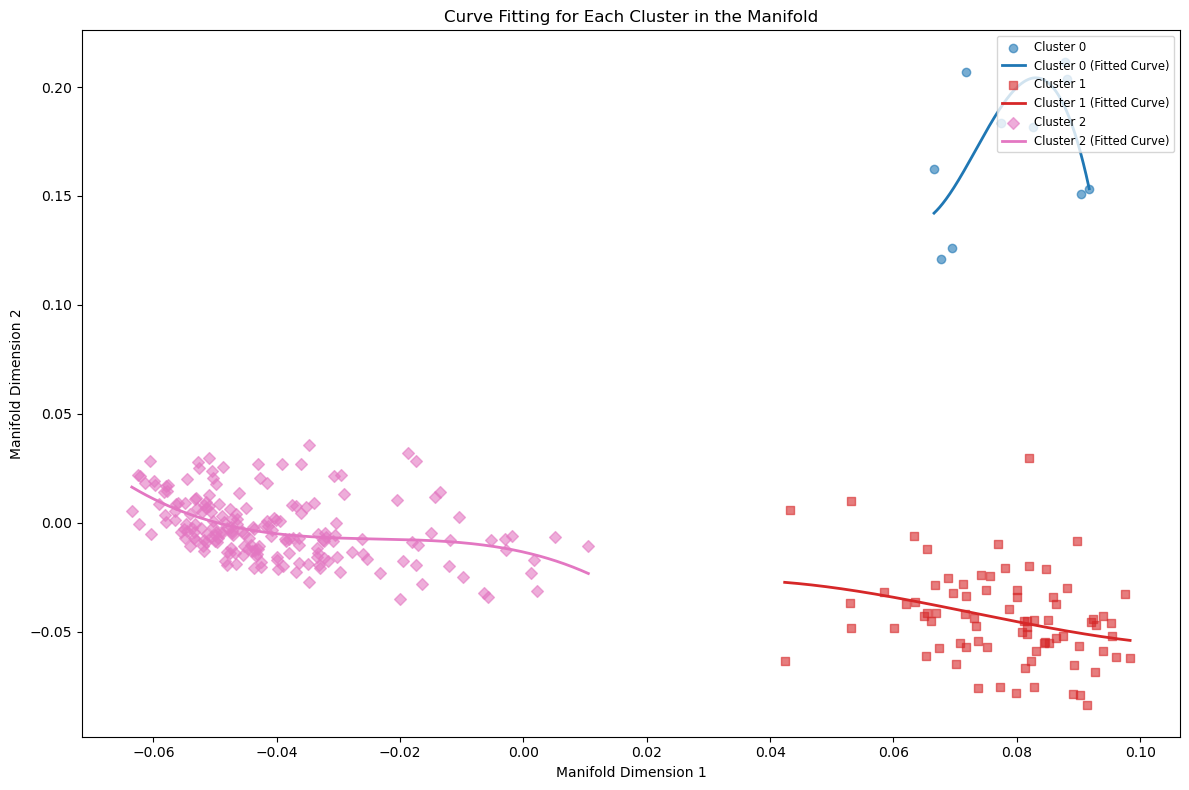

In [29]:
# Modeling Regions of the Manifold
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Extract unique labels (clusters)
unique_labels = set(labels)

# Step 1: Visualize clusters and fit curves
plt.figure(figsize=(12, 8))
shapes = ['o', 's', 'D', '^', 'v']  # Shapes for clusters
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))  # Colormap for clusters

for k, color, shape in zip(unique_labels, colors, shapes):
    if k == -1:
        continue  # Skip noise points

    cluster_name = f"Cluster {k}"
    class_member_mask = (labels == k)
    xy = manifold[class_member_mask]  # Points in the cluster

    # Step 2: Scatter plot of points in the cluster
    plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=color, label=cluster_name, alpha=0.6)

    # Step 3: Fit a curve to the cluster points
    # Sort points by x to make curve fitting easier
    xy = xy[np.argsort(xy[:, 0])]
    x, y = xy[:, 0], xy[:, 1]

    # Fit a polynomial of degree 3 (can adjust degree as needed)
    p = Polynomial.fit(x, y, deg=3)

    # Generate points along the fitted curve
    x_fit = np.linspace(x.min(), x.max(), 500)
    y_fit = p(x_fit)

    # Step 4: Plot the fitted curve
    plt.plot(x_fit, y_fit, '-', color=color, linewidth=2, label=f"{cluster_name} (Fitted Curve)")

# Add title, legend, and labels
plt.title("Curve Fitting for Each Cluster in the Manifold")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.legend(loc='upper right', fontsize='small')
plt.tight_layout()
plt.show()


/home/shussein/anaconda3/envs/ManifoldLearning/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/shussein/anaconda3/envs/ManifoldLearning/lib/python3.9/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


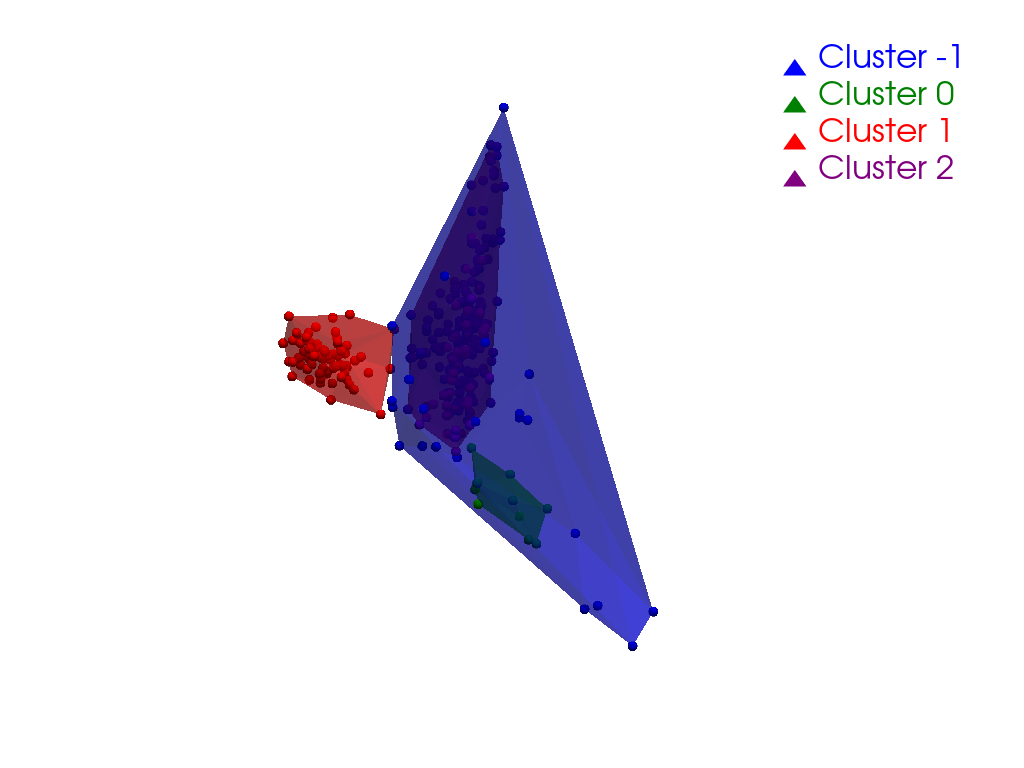

In [33]:
import numpy as np
import pyvista as pv

# Example: Points in all clusters
unique_labels = np.unique(labels)  # Get unique cluster labels

# Initialize the PyVista plotter
plotter = pv.Plotter()

# Colors for each cluster
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan']  # Extend this if you have more clusters

# Iterate through each cluster
for i, cluster_label in enumerate(unique_labels):
    cluster_points = manifold[labels == cluster_label]  # Points belonging to the current cluster

    # Create a PyVista point cloud
    point_cloud = pv.PolyData(cluster_points)

    # Generate an alpha shape (volume representation)
    alpha = 5.0  # Adjust alpha value for desired level of concavity
    volume = point_cloud.delaunay_3d(alpha=alpha)

    # Extract surface for visualization
    surface = volume.extract_geometry()

    # Add the surface and points to the plotter
    plotter.add_mesh(surface, color=colors[i % len(colors)], opacity=0.5, label=f"Cluster {cluster_label}")
    plotter.add_points(cluster_points, color=colors[i % len(colors)], point_size=10, render_points_as_spheres=True)

# Add legend and show the plot
plotter.add_legend()
plotter.show()

In [39]:
import numpy as np
from sklearn.neighbors import KernelDensity
import pyvista as pv

# Example: Points in a cluster
cluster_points = manifold[labels == 0]  # Replace with your actual cluster data

# Fit a kernel density model
kde = KernelDensity(bandwidth=0.5)  # Adjust bandwidth to control smoothing
kde.fit(cluster_points)

# Define a 3D grid to evaluate the density
x = np.linspace(cluster_points[:, 0].min(), cluster_points[:, 0].max(), 50)
y = np.linspace(cluster_points[:, 1].min(), cluster_points[:, 1].max(), 50)
z = np.linspace(cluster_points[:, 2].min(), cluster_points[:, 2].max(), 50)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Create a grid for evaluation
grid_points = np.c_[X.ravel(), Y.ravel(), Z.ravel()]

# Evaluate the density on the grid
density = np.exp(kde.score_samples(grid_points)).reshape(X.shape)

# Create a PyVista UniformGrid object
grid = pv.UniformGrid()
grid.dimensions = X.shape
grid.origin = (x[0], y[0], z[0])  # Grid origin
grid.spacing = (
    x[1] - x[0],
    y[1] - y[0],
    z[1] - z[0],
)  # Spacing between points

# Add density values as scalars to the grid
grid['density'] = density.ravel()

# Extract an isosurface at a specific density level
iso_surface = grid.contour([0.02])  # Adjust level to control surface detail

# Visualize the KDE-based volume
plotter = pv.Plotter()
plotter.add_mesh(iso_surface, color='lightblue', opacity=0.5)
plotter.add_points(cluster_points, color='red', point_size=10, render_points_as_spheres=True)
plotter.show()


AttributeError: module 'pyvista' has no attribute 'UniformGrid'

PyVista version: 0.44.2
Available attributes: ['AVSucdReader', 'AmbiguousDataError', 'AnnotatedIntEnum', 'ArrayLike', 'Arrow', 'ArrowSource', 'AxesGeometrySource', 'BMPReader', 'BUILDING_GALLERY', 'BYUReader', 'BaseReader', 'BinaryMarchingCubesReader', 'BoundsLike', 'Box', 'BoxSource', 'CGNSReader', 'Capsule', 'Cell', 'CellArray', 'CellArrayLike', 'CellType', 'CellsLike', 'Circle', 'CircularArc', 'CircularArcFromNormal', 'CompositeFilters', 'Cone', 'ConeSource', 'Cube', 'CubeSource', 'Cylinder', 'CylinderSource', 'CylinderStructured', 'DEFAULT_SCALARS_NAME', 'DEMReader', 'DICOMReader', 'DataObject', 'DataSet', 'DataSetAttributes', 'DataSetFilters', 'DeprecationError', 'Disc', 'DiscSource', 'Dodecahedron', 'Ellipse', 'EnSightReader', 'ExplicitStructuredGrid', 'FIGURE_PATH', 'FLOAT_FORMAT', 'FLUENTCFFReader', 'FacetReader', 'FieldAssociation', 'FluentReader', 'GESignaReader', 'GIFReader', 'GLTFReader', 'GPUInfo', 'GambitReader', 'GaussianCubeReader', 'Grid', 'HDFReader', 'HDRReader', 'ID

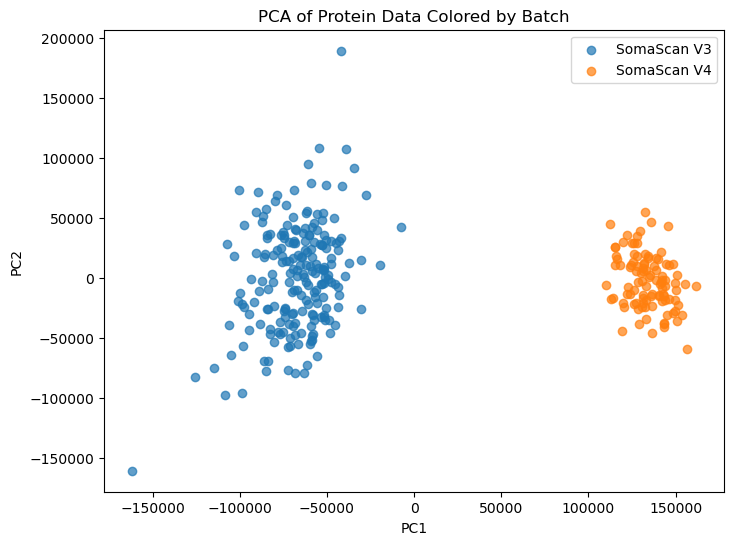

In [89]:
# Identifying and Visualizing Batch Effects - Visits 1 & 2 Proteins were Collected using SomaScan V3, while Visit 3 using SomaScan V4 - 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = COPDGene_dataset
df = df.reset_index()
# Select protein data
protein_columns = [col for col in df.columns if col.startswith('X')]
protein_data = df[protein_columns]

# Apply PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(protein_data)

# Add batch information
df['Batch'] = df['Visitnum'].apply(lambda x: 'V3' if x in [1, 2] else 'V4')

# Plot PCA results
plt.figure(figsize=(8, 6))
for batch in df['Batch'].unique():
    subset = df[df['Batch'] == batch]
    plt.scatter(pca_results[subset.index, 0], pca_results[subset.index, 1], label=f'SomaScan {batch}', alpha=0.7)

plt.title('PCA of Protein Data Colored by Batch')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [92]:
# Correcting for Batch Effects
from combat.pycombat import pycombat

# Add batch information as a categorical column
df['Batch'] = df['Visitnum'].apply(lambda x: 'V3' if x in [1, 2] else 'V4')

# Apply ComBat to correct for batch effects
protein_data_corrected = pycombat(df[protein_columns].T, batch=df['Batch']).T

# Update the DataFrame
df[protein_columns] = protein_data_corrected


Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


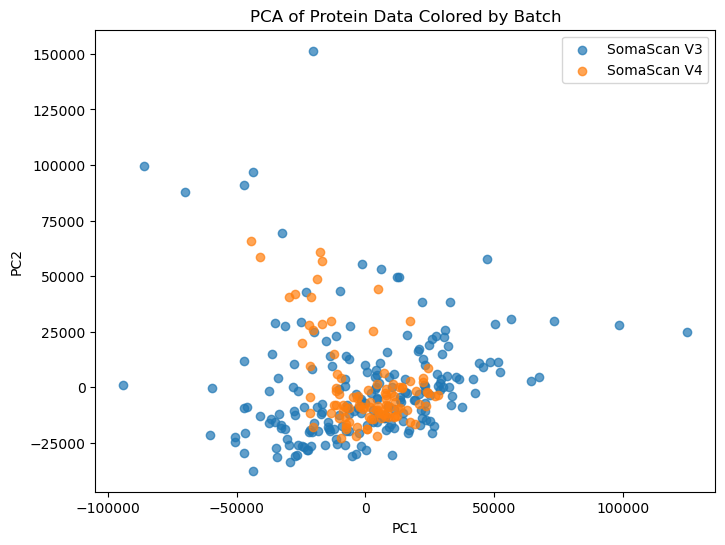

In [93]:
# Identifying and Visualizing Batch Effects - Visits 1 & 2 Proteins were Collected using SomaScan V3, while Visit 3 using SomaScan V4 - 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# df = COPDGene_dataset
# df = df.reset_index()
# Select protein data
protein_columns = [col for col in df.columns if col.startswith('X')]
protein_data = df[protein_columns]

# Apply PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(protein_data)

# Add batch information
df['Batch'] = df['Visitnum'].apply(lambda x: 'V3' if x in [1, 2] else 'V4')

# Plot PCA results
plt.figure(figsize=(8, 6))
for batch in df['Batch'].unique():
    subset = df[df['Batch'] == batch]
    plt.scatter(pca_results[subset.index, 0], pca_results[subset.index, 1], label=f'SomaScan {batch}', alpha=0.7)

plt.title('PCA of Protein Data Colored by Batch')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [95]:
df

SID    X10339_48    X11105_171     X11510_31    X13090_17  \
0    10062C  9299.701003  54008.668875  32955.005521  4424.495150   
1    10062C  4209.872198  11419.511172  29604.395967  2996.292451   
2    10062C  6507.748733  12481.641589  29211.427188  2542.174670   
3    10077P  9503.580400  12041.695585  38053.449053  3392.554543   
4    10077P  3156.238066   6331.572693  29856.655937  2416.126293   
..      ...          ...           ...           ...          ...   
301  21449L  4749.387877   8002.013771  28495.491505  1743.232789   
302  21449L  8276.015852  11040.350242  29631.899827  2400.692333   
303  22660M  7031.209458  55070.304620  30762.162742  3945.429710   
304  22660M  4336.156752   4785.659979  29150.980197  2812.853572   
305  22660M  5045.750334   9643.670443  30334.440824  2533.628757   

      X14116_129      X2201_17      X2418_55      X2579_17      X2602_2  ...  \
0    2297.906306  56683.473981  39588.743371  15193.830288  4512.940870  ...   
1    2476.210703  59988.441872  28174.039195  24119.074478  4540.358909  ...   
2    2242.997555  54526.324241  38116.394056  23282.631663  6404.570937  ...   
3    2486.881569  55733.170763  34342.879966  13336.414007  4477.221257  ...   
4    2017.651881  55019.790557  43370.229265  22226.574980  4497.251658  ...   
..           ...           ...           ...           ...          ...  ...   
301  2176.272858  56706.403330  30756.529219  20003.628510  4538.302556  ...   
302  2195.882185  54628.938361  37912.900772  22159.561985  4754.581115  ...   
303  2373.611772  52947.540397  48665.281413  20104.298877  4478.668321  ...   
304  2488.539879  57075.149701  45747.757193  18160.319374  4477.145096  ...   
305  2089.447791  53931.321253  38070.496510  24257.550888  3514.633454  ...   

        X5456_59     X5465_32       X5483_1     X5843_60     X6641_60  \
0    5959.951916  1988.810072  15061.341633   830.485081  2430.289946   
1    4694.582671  1959.763232  14223.030940   716.646972  2478.439599   
2    5345.537599  2186.227662  15010.799679   833.636263  2211.609889   
3    8555.785031  2535.463684  15207.313935   915.533166  2562.010424   
4    6814.041482  2368.493758  14549.016129  1005.281662  1787.694585   
..           ...          ...           ...          ...          ...   
301  5935.448967  2212.095299  14682.676924   747.640315  1379.611817   
302  6888.621063  2260.027867  15083.533278   930.381372  1981.421311   
303  6850.102425  2426.538037  15661.907786   892.031104  2048.371275   
304  5021.072902  2282.094230  15056.142351  1048.613588  2050.106977   
305  5719.907374  2303.357877  15457.910515   888.059306  1998.276650   

         X7655_11  Visitnum  finalgold_visit  age_visit  Batch  
0     2451.093423         1              3.0       64.6     V3  
1    11192.182933         2              4.0       70.0     V3  
2     9475.987870         3              4.0       74.8     V4  
3     5532.255043         1              3.0       62.4     V3  
4     8733.519893         2              3.0       67.8     V3  
..            ...       ...              ...        ...    ...  
301  16203.334399         2              1.0       68.1     V3  
302  23400.041937         3              0.0       72.5     V4  
303   3396.843192         1              0.0       72.6     V3  
304   5355.132256         2              0.0       77.5     V3  
305   5652.986159         3              1.0       82.3     V4  

[306 rows x 90 columns]

Reconstruction Error: 0.12370996623355013
Neighborhood Preservation Score: 0.2169934640522876
Pairwise Distance Preservation Score: 0.3978503666592268


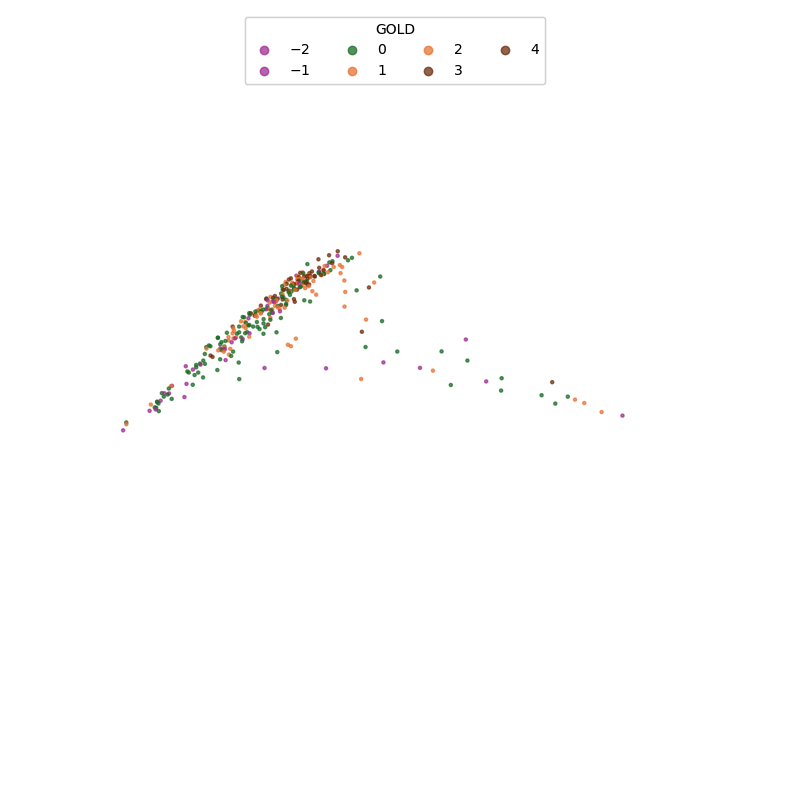

In [120]:
# A Simple Feature Selection Approach Prior to Running Manifold Learning LLE (Selecting the Top K-Related Features)
X = df.loc[:, ~df.columns.isin(['finalgold_visit', 'Visitnum', 'age_visit', 'SID', 'Batch'])]
# Select all Columns Except 'Visitnum' and 'finalgold_visit'
Y = df['finalgold_visit']
k = 30
corr = X[X.columns].corrwith(Y).abs().sort_values(ascending=False)
trimmed = X[corr[:k].index.tolist()]

# Standardize the dataset
scaler = StandardScaler()
trimmed = pd.DataFrame(scaler.fit_transform(trimmed), columns=trimmed.columns)

lle = LocallyLinearEmbedding(n_neighbors=15, n_components=3, reg=0.08533165867623197, max_iter=1000, random_state=42)
embedding = lle.fit_transform(trimmed)

# Evaluating the Quality of the Generated Manifold
reconstruction_error = lle.reconstruction_error_
neighborhood_preservation_score = compute_neighborhood_preservation(trimmed, embedding)
pairwise_distances_preservation_score_euclidean = compute_distance_preservation(trimmed, embedding)
pairwise_distances_preservation_score_manhattan = compute_distance_preservation(trimmed, embedding, 'manhattan')

print("Reconstruction Error: %s\nNeighborhood Preservation Score: %s\nPairwise Distance Preservation Score: %s" %
      (reconstruction_error,
       neighborhood_preservation_score,
       pairwise_distances_preservation_score_euclidean))
# Create a 3D scatter plot of the LLE embedding
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
custom_cmap = ListedColormap(['#A02B93', '#196B24', '#E97132', '#6E2D0C'])  # Red, Green, Blue, Yellow
sc = ax.scatter(embedding[:, 0], embedding[:, 1], c=Y, s=5, alpha=0.7, cmap=custom_cmap)

legend1 = ax.legend(*sc.legend_elements(), loc="upper center", title="GOLD", ncol=4)
ax.add_artist(legend1)
ax.grid(False)
ax.set_axis_off()
fig.patch.set_alpha(0.0)

plt.show()

Estimated number of clusters: 2
Estimated number of noise points: 0
Silhouette Score: 0.50


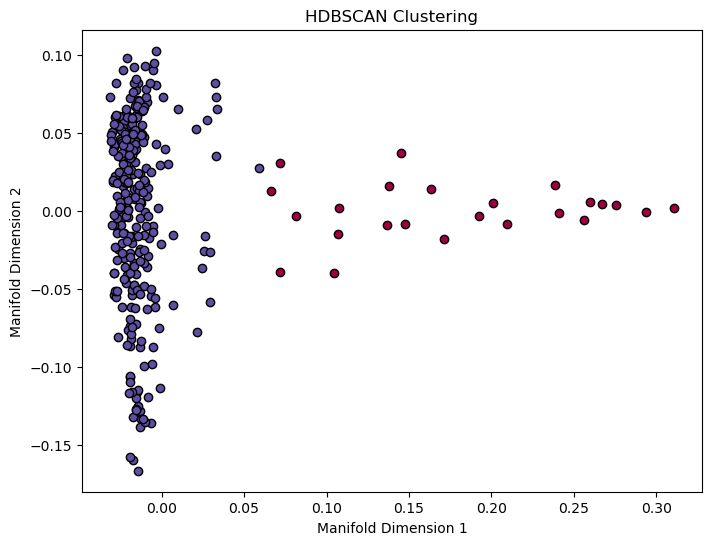

In [121]:
import numpy as np
import pandas as pd
import hdbscan
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Example: Assume `manifold` is a 2D or 3D array-like object (from LLE output)
manifold = embedding

# Step 1: Initialize HDBSCAN with parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, cluster_selection_epsilon=0.5)

# Step 2: Fit HDBSCAN
clusterer.fit(manifold)
labels = clusterer.labels_

# Step 3: Evaluate clustering
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# If more than one cluster is found, calculate silhouette score
if n_clusters > 1:
    silhouette = silhouette_score(manifold, labels)
    print(f"Silhouette Score: {silhouette:.2f}")

# Step 4: Visualize clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = manifold[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title("HDBSCAN Clustering")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.show()


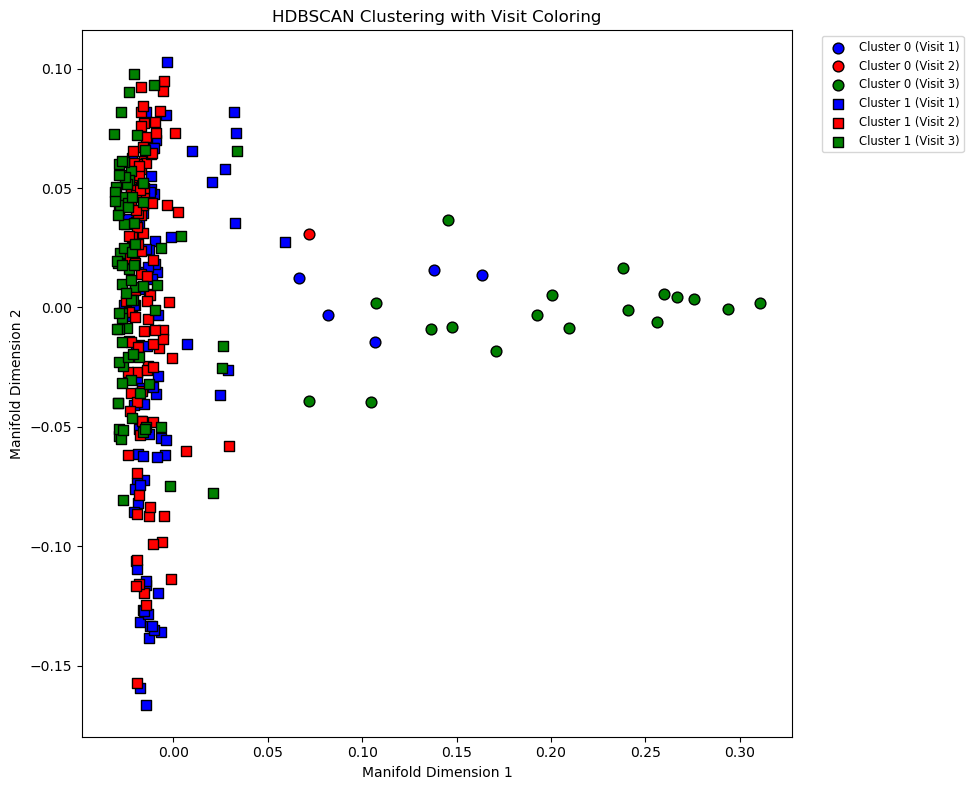

Visit Counts per Cluster:
   Cluster  Visit1  Visit2  Visit3
0        0       5       1      18
1        1      97     101      84


In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert gender to a NumPy array for element-wise comparison
visit = np.array(COPDGene_clinical_dataset['visitnum'].tolist())

# Initialize a dictionary to store cluster and visit counts
cluster_visit_counts = {}

# Step 4: Visualize clusters with sex and shapes
plt.figure(figsize=(10, 8))

# Assign distinct shapes for clusters
shapes = ['o', 's', 'D', '^', 'v']  # Extend as needed for more clusters
colors = {1: 'blue', 2: 'red', 3: 'green'}  # Define colors for visit

unique_labels = set(labels)

for k, shape in zip(unique_labels, shapes):
    cluster_visit_counts[k] = {'Visit1': 0, 'Visit2': 0, 'Visit3': 0}

    # Handle noise cluster
    if k == -1:
        color = 'gray'
        shape = 'x'  # Unfilled marker for noise
        cluster_name = "Noise"
    else:
        cluster_name = f"Cluster {k}"

    class_member_mask = (labels == k)

    for visit_i, visit_name in zip([1, 2, 3], ['Visit1', 'Visit2', 'Visit3']):
        visit_mask = (visit == visit_i)  # Perform element-wise comparison
        final_mask = class_member_mask & visit_mask  # Combine masks

        xy = manifold[final_mask]  # Apply mask to manifold

        # Count males and females in the cluster
        cluster_visit_counts[k][visit_name] += np.sum(final_mask)

        # Set edgecolor only for filled markers
        if shape in ['o', 's', 'D', '^', 'v']:
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[visit_i],
                        edgecolor='k', s=60, label=f"{cluster_name} (Visit {visit_i})" if k != -1 else "Noise")
        else:  # Unfilled marker
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[visit_i],
                        s=60, label=f"{cluster_name} (Gender {visit_i})" if k != -1 else "Noise")

# Add title and legend
plt.title("HDBSCAN Clustering with Visit Coloring")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Create a DataFrame from the cluster_visit_counts dictionary
cluster_visit_df = pd.DataFrame(cluster_visit_counts).T.reset_index()
cluster_visit_df.columns = ['Cluster', 'Visit1', 'Visit2', 'Visit3']

# Display the table
print("Visit Counts per Cluster:")
print(cluster_visit_df)

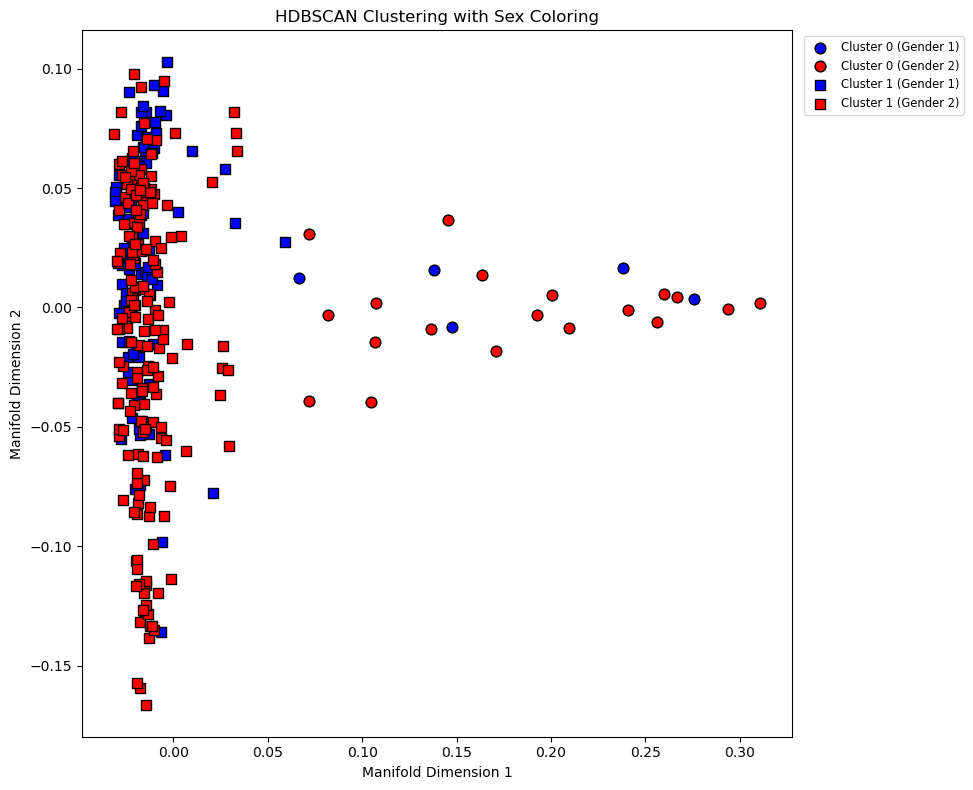

Gender Counts per Cluster:
   Cluster  Male  Female
0        0     5      19
1        1   103     179


In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert gender to a NumPy array for element-wise comparison
gender = np.array(COPDGene_clinical_dataset['gender'].tolist())

# Initialize a dictionary to store cluster and gender counts
cluster_gender_counts = {}

# Step 4: Visualize clusters with sex and shapes
plt.figure(figsize=(10, 8))

# Assign distinct shapes for clusters
shapes = ['o', 's', 'D', '^', 'v']  # Extend as needed for more clusters
colors = {1: 'blue', 2: 'red'}  # Define colors for gender

unique_labels = set(labels)

for k, shape in zip(unique_labels, shapes):
    cluster_gender_counts[k] = {'Male': 0, 'Female': 0}

    # Handle noise cluster
    if k == -1:
        color = 'gray'
        shape = 'x'  # Unfilled marker for noise
        cluster_name = "Noise"
    else:
        cluster_name = f"Cluster {k}"

    class_member_mask = (labels == k)

    for gender_i, gender_name in zip([1, 2], ['Male', 'Female']):
        gender_mask = (gender == gender_i)  # Perform element-wise comparison
        final_mask = class_member_mask & gender_mask  # Combine masks

        xy = manifold[final_mask]  # Apply mask to manifold

        # Count males and females in the cluster
        cluster_gender_counts[k][gender_name] += np.sum(final_mask)

        # Set edgecolor only for filled markers
        if shape in ['o', 's', 'D', '^', 'v']:
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[gender_i],
                        edgecolor='k', s=60, label=f"{cluster_name} (Gender {gender_i})" if k != -1 else "Noise")
        else:  # Unfilled marker
            plt.scatter(xy[:, 0], xy[:, 1], marker=shape, color=colors[gender_i],
                        s=60, label=f"{cluster_name} (Gender {gender_i})" if k != -1 else "Noise")

# Add title and legend
plt.title("HDBSCAN Clustering with Sex Coloring")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Create a DataFrame from the cluster_gender_counts dictionary
cluster_gender_df = pd.DataFrame(cluster_gender_counts).T.reset_index()
cluster_gender_df.columns = ['Cluster', 'Male', 'Female']

# Display the table
print("Gender Counts per Cluster:")
print(cluster_gender_df)

In [ ]:
# Correcting for Batch Effects by Regressing Out the Batch Effect from Each Protein
import statsmodels.api as sm

# Correct each protein for batch effects
for protein in protein_columns:
    # Create dummy variables for the batch
    batch_dummies = pd.get_dummies(df['Batch'], drop_first=True)

    # Regression model: Protein ~ Batch
    X = sm.add_constant(batch_dummies)  # Add intercept
    y = df[protein]
    model = sm.OLS(y, X).fit()

    # Adjusted protein values (residuals)
    df[protein] = model.resid
